<img src='https://gitlab.com/alessandro.bombini.fi/dataviz_labec/-/raw/master/Assets/Pics/labec.png' >

In [4]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    print(f'Using Google Colab Notebook')
    from google.colab import drive
    drive.mount('/content/drive')

    %cd '/content/drive/MyDrive/DataViz@LABEC/'

    !ls
else: 
    print(f'Using Jupyter Notebook')
    %config Completer.use_jedi = False

Using Jupyter Notebook


# 2 - Dataframes in Python: Pandas package

## 2.1. Loading data - .csv, .xlsx dataframes

In [2]:
import numpy as np

import pandas as pd

In [3]:
df = pd.read_csv(
    './Datasets/Animal_Crossing/villagers.csv',
)

display( df.head() )

Name    Species  Gender Personality    Hobby Birthday Catchphrase  \
0  Admiral       Bird    Male      Cranky   Nature   27-Jan     aye aye   
1  Agent S   Squirrel  Female       Peppy  Fitness    2-Jul    sidekick   
2    Agnes        Pig  Female  Big Sister     Play   21-Apr     snuffle   
3       Al    Gorilla    Male        Lazy  Fitness   18-Oct     ayyyeee   
4  Alfonso  Alligator    Male        Lazy     Play    9-Jun    it'sa me   

   Favorite Song Style 1  Style 2 Color 1 Color 2               Wallpaper  \
0     Steep Hill    Cool     Cool   Black    Blue          dirt-clod wall   
1  Go K.K. Rider  Active   Simple    Blue   Black           concrete wall   
2     K.K. House  Simple  Elegant    Pink   White  gray molded-panel wall   
3  Go K.K. Rider  Active   Active     Red   White           concrete wall   
4    Forest Life  Simple   Simple     Red    Blue    yellow playroom wall   

                 Flooring                                     Furniture List  \
0                  tatami  717;1849;7047;2736;787;5970;3449;3622;3802;410...   
1  colorful tile flooring  7845;7150;3468;4080;290;3971;3449;1708;4756;25...   
2      arabesque flooring  4129;7236;7235;7802;896;3428;4027;7325;3958;71...   
3   green rubber flooring  1452;4078;4013;833;4116;3697;7845;3307;3946;39...   
4    green honeycomb tile  4763;3205;3701;1557;3623;85;3208;3584;4761;121...   

  Filename    Unique Entry ID  
0    brd06  B3RyfNEqwGmcccRC3  
1    squ05  SGMdki6dzpDZyXAw5  
2    pig17  jzWCiDPm9MqtCfecP  
3    gor08  LBifxETQJGEaLhBjC  
4    crd00  REpd8KxB8p9aGBRSE

In [4]:
# Dataframe Columns
print(df.columns)


display(df['Name'].head())

Index(['Name', 'Species', 'Gender', 'Personality', 'Hobby', 'Birthday',
       'Catchphrase', 'Favorite Song', 'Style 1', 'Style 2', 'Color 1',
       'Color 2', 'Wallpaper', 'Flooring', 'Furniture List', 'Filename',
       'Unique Entry ID'],
      dtype='object')


0    Admiral
1    Agent S
2      Agnes
3         Al
4    Alfonso
Name: Name, dtype: object

In [5]:
df = pd.read_excel(
    './Datasets/Pokemon/Pokemon.xlsx',
     engine='openpyxl',
    index_col=None
)

display( df.head() )

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

## 2.1.1. Creating a df from scratch and storing into .csv

In [6]:
data = {
    'name': ['Messi', 'C. Ronaldo', 'Venuti' ],
    'team': ['PSG', 'Machester United', 'Fiorentina' ],
    'shirt number': [10, 7, 23]
}

df = pd.DataFrame(
    data = data,
    columns = data.keys()
)

display(
    df
)


# from https://www.transfermarkt.it/
df['value (M€)'] = [60, 35, 3]

display(
    df
)

# store to csv
df.to_csv(
    './Datasets/myDataFrame.csv'
)

name              team  shirt number
0       Messi               PSG            10
1  C. Ronaldo  Machester United             7
2    Vlahovic        Fiorentina             9

name              team  shirt number  value (M€)
0       Messi               PSG            10          60
1  C. Ronaldo  Machester United             7          35
2    Vlahovic        Fiorentina             9          70

## 2.2. Basic df infos, Slicing, Queries, iterations

In [7]:
df = pd.read_excel(
    './Datasets/Pokemon/Pokemon.xlsx',
     engine='openpyxl',
    index_col=None
)

display( df.head() )

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

### 2.2.1. Infos:

In [8]:
# Get few info
print('DataFrame Shape:')
display(df.shape)

print('DataFrame Index:')
display(df.index)

print('DataFrame Columns:')
display(df.columns)

print('\nDataFrame General Infos:')
display(df.info())

print('\nDataFrame non-NaN values:')
display(df.count())

DataFrame Shape:


(800, 13)

DataFrame Index:


RangeIndex(start=0, stop=800, step=1)

DataFrame Columns:


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


DataFrame General Infos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


None


DataFrame non-NaN values:


#             800
Name          800
Type 1        800
Type 2        414
Total         800
HP            800
Attack        800
Defense       800
Sp. Atk       800
Sp. Def       800
Speed         800
Generation    800
Legendary     800
dtype: int64

### 2.2.2. Query:

In [9]:
# Extract single column as pandas series
pokemon_names = df['Name']
display(pokemon_names)

# Extract single row by index
pikachu_data = df.iloc[30]
display(pikachu_data)

# Slice dataframe

df_second_generation = df[166:272]
display(df_second_generation)

0                  Bulbasaur
1                    Ivysaur
2                   Venusaur
3      VenusaurMega Venusaur
4                 Charmander
               ...          
795                  Diancie
796      DiancieMega Diancie
797      HoopaHoopa Confined
798       HoopaHoopa Unbound
799                Volcanion
Name: Name, Length: 800, dtype: object

#                   25
Name           Pikachu
Type 1        Electric
Type 2             NaN
Total              320
HP                  35
Attack              55
Defense             40
Sp. Atk             50
Sp. Def             50
Speed               90
Generation           1
Legendary        False
Name: 30, dtype: object

#                     Name   Type 1  Type 2  Total   HP  Attack  \
166  152                Chikorita    Grass     NaN    318   45      49   
167  153                  Bayleef    Grass     NaN    405   60      62   
168  154                 Meganium    Grass     NaN    525   80      82   
169  155                Cyndaquil     Fire     NaN    309   39      52   
170  156                  Quilava     Fire     NaN    405   58      64   
..   ...                      ...      ...     ...    ...  ...     ...   
267  248                Tyranitar     Rock    Dark    600  100     134   
268  248  TyranitarMega Tyranitar     Rock    Dark    700  100     164   
269  249                    Lugia  Psychic  Flying    680  106      90   
270  250                    Ho-oh     Fire  Flying    680  106     130   
271  251                   Celebi  Psychic   Grass    600  100     100   

     Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  
166       65       49       65     45           2      False  
167       80       63       80     60           2      False  
168      100       83      100     80           2      False  
169       43       60       50     65           2      False  
170       58       80       65     80           2      False  
..       ...      ...      ...    ...         ...        ...  
267      110       95      100     61           2      False  
268      150       95      120     71           2      False  
269      130       90      154    110           2       True  
270       90      110      154     90           2       True  
271      100      100      100    100           2      False  

[106 rows x 13 columns]

In [10]:
# Filter under condition
print('Single condition:')
display(
    df[
        df['Attack']>100
    ]
)

print('Multiple condition:')
# NB: note the usage of the ~ (tilde) operator as a NOT 
display(
    df[
        (df['Attack']>100) & (~df['Legendary'])
    ]
)

Single condition:


#                       Name   Type 1  Type 2  Total   HP  Attack  \
7      6  CharizardMega Charizard X     Fire  Dragon    634   78     130   
8      6  CharizardMega Charizard Y     Fire  Flying    634   78     104   
12     9    BlastoiseMega Blastoise    Water     NaN    630   79     103   
19    15      BeedrillMega Beedrill      Bug  Poison    495   65     150   
39    34                   Nidoking   Poison  Ground    505   81     102   
..   ...                        ...      ...     ...    ...  ...     ...   
793  717                    Yveltal     Dark  Flying    680  126     131   
796  719        DiancieMega Diancie     Rock   Fairy    700   50     160   
797  720        HoopaHoopa Confined  Psychic   Ghost    600   80     110   
798  720         HoopaHoopa Unbound  Psychic    Dark    680   80     160   
799  721                  Volcanion     Fire   Water    600   80     110   

     Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  
7        111      130       85    100           1      False  
8         78      159      115    100           1      False  
12       120      135      115     78           1      False  
19        40       15       80    145           1      False  
39        77       85       75     85           1      False  
..       ...      ...      ...    ...         ...        ...  
793       95      131       98     99           6       True  
796      110      160      110    110           6       True  
797       60      150      130     70           6       True  
798       60      170      130     80           6       True  
799      120      130       90     70           6       True  

[170 rows x 13 columns]

Multiple condition:


#                       Name  Type 1  Type 2  Total  HP  Attack  \
7      6  CharizardMega Charizard X    Fire  Dragon    634  78     130   
8      6  CharizardMega Charizard Y    Fire  Flying    634  78     104   
12     9    BlastoiseMega Blastoise   Water     NaN    630  79     103   
19    15      BeedrillMega Beedrill     Bug  Poison    495  65     150   
39    34                   Nidoking  Poison  Ground    505  81     102   
..   ...                        ...     ...     ...    ...  ..     ...   
750  681       AegislashBlade Forme   Steel   Ghost    520  60     150   
759  689                 Barbaracle    Rock   Water    500  72     105   
767  697                  Tyrantrum    Rock  Dragon    521  82     121   
779  709                  Trevenant   Ghost   Grass    474  85     110   
789  713                    Avalugg     Ice     NaN    514  95     117   

     Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  
7        111      130       85    100           1      False  
8         78      159      115    100           1      False  
12       120      135      115     78           1      False  
19        40       15       80    145           1      False  
39        77       85       75     85           1      False  
..       ...      ...      ...    ...         ...        ...  
750       50      150       50     60           6      False  
759      115       54       86     68           6      False  
767      119       69       59     71           6      False  
779       76       65       82     56           6      False  
789      184       44       46     28           6      False  

[132 rows x 13 columns]

In [11]:
# Extract single Series from query

print('NB:')

query =  (df['Attack']>100) & (~df['Legendary'])

display(df[query]['Total'])

NB:


7      634
8      634
12     630
19     495
39     505
      ... 
750    520
759    500
767    521
779    474
789    514
Name: Total, Length: 132, dtype: int64

#### 2.2.2.1. the ```.query()``` method 
**We can use also the STRING matching**

pandas allows to use string grammar for queries, by employing the ```.query()``` built-in method.

From the documentation (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html):
```
The query() method uses a slightly modified Python syntax by default. For example, the & and | (bitwise) operators have the precedence of their boolean cousins, and and or. This is syntactically valid Python, however the semantics are different.
```

e.g., for the same query as above:

In [12]:
query =  'Attack > 100 and Legendary == False' 

display(df.query(query)['Total'])

7      634
8      634
12     630
19     495
39     505
      ... 
750    520
759    500
767    521
779    474
789    514
Name: Total, Length: 132, dtype: int64

### 2.2.3. Stats

In [13]:
query =  (df['Attack']>100) & (~df['Legendary'])


# Get Min, Max, Avg value:
min_val = df[query]['Total'].min()
print(f'Min Total of a Pkmn with attack>100: { min_val }')

max_val = df[query]['Total'].max()
print(f'Max Total of a Pkmn with attack>100: { max_val }')

mean_val = df[query]['Total'].mean()
print(f'Mean Total of a Pkmn with attack>100: { mean_val }')

# Get the Entries  
display( df.loc[query & (df[query]['Total'] == min_val)] )

# Get the index 
idx = np.where(
    query & (df[query]['Total'] == min_val)
)
print(f'Index of element: {idx}')

df.loc[idx]

Min Total of a Pkmn with attack>100: 325
Max Total of a Pkmn with attack>100: 700
Mean Total of a Pkmn with attack>100: 526.969696969697


#    Name Type 1 Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
106  98  Krabby  Water    NaN    325  30     105       90       25       25   

     Speed  Generation  Legendary  
106     50           1      False

Index of element: (array([106]),)


#    Name Type 1 Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
106  98  Krabby  Water    NaN    325  30     105       90       25       25   

     Speed  Generation  Legendary  
106     50           1      False

In [14]:
df[df['Generation'] == 2]

#                     Name   Type 1  Type 2  Total   HP  Attack  \
166  152                Chikorita    Grass     NaN    318   45      49   
167  153                  Bayleef    Grass     NaN    405   60      62   
168  154                 Meganium    Grass     NaN    525   80      82   
169  155                Cyndaquil     Fire     NaN    309   39      52   
170  156                  Quilava     Fire     NaN    405   58      64   
..   ...                      ...      ...     ...    ...  ...     ...   
267  248                Tyranitar     Rock    Dark    600  100     134   
268  248  TyranitarMega Tyranitar     Rock    Dark    700  100     164   
269  249                    Lugia  Psychic  Flying    680  106      90   
270  250                    Ho-oh     Fire  Flying    680  106     130   
271  251                   Celebi  Psychic   Grass    600  100     100   

     Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  
166       65       49       65     45           2      False  
167       80       63       80     60           2      False  
168      100       83      100     80           2      False  
169       43       60       50     65           2      False  
170       58       80       65     80           2      False  
..       ...      ...      ...    ...         ...        ...  
267      110       95      100     61           2      False  
268      150       95      120     71           2      False  
269      130       90      154    110           2       True  
270       90      110      154     90           2       True  
271      100      100      100    100           2      False  

[106 rows x 13 columns]

In [15]:
# WRAP UP:
# splits dataframes by generations

dict_of_df_by_generations = {}

for generation in df['Generation'].unique():
    dict_of_df_by_generations[f'{generation}'] = df[ df['Generation'] == generation ]

display(dict_of_df_by_generations['3'])

#                   Name   Type 1   Type 2  Total   HP  Attack  \
272  252                Treecko    Grass      NaN    310   40      45   
273  253                Grovyle    Grass      NaN    405   50      65   
274  254               Sceptile    Grass      NaN    530   70      85   
275  254  SceptileMega Sceptile    Grass   Dragon    630   70     110   
276  255                Torchic     Fire      NaN    310   45      60   
..   ...                    ...      ...      ...    ...  ...     ...   
427  385                Jirachi    Steel  Psychic    600  100     100   
428  386     DeoxysNormal Forme  Psychic      NaN    600   50     150   
429  386     DeoxysAttack Forme  Psychic      NaN    600   50     180   
430  386    DeoxysDefense Forme  Psychic      NaN    600   50      70   
431  386      DeoxysSpeed Forme  Psychic      NaN    600   50      95   

     Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  
272       35       65       55     70           3      False  
273       45       85       65     95           3      False  
274       65      105       85    120           3      False  
275       75      145       85    145           3      False  
276       40       70       50     45           3      False  
..       ...      ...      ...    ...         ...        ...  
427      100      100      100    100           3       True  
428       50      150       50    150           3       True  
429       20      180       20    150           3       True  
430      160       70      160     90           3       True  
431       90       95       90    180           3       True  

[160 rows x 13 columns]

### Exercises

In [16]:
# EXERCISES:

print('What is the Pokemon whose attack is greater that 100 but has the minimum Total?')

print('What is the Pokemon whose defense is greater that 100 but has the minimum Total AND is non-legendary?')

What is the Pokemon whose attack is greater that 100 but has the minimum Total?
What is the Pokemon whose defense is greater that 100 but has the minimum Total AND is non-legendary?


### 2.2.A. SQL queries into Pandas

One of the most used languages for extract data from database is **SQL** (*Structured Queries Language*); from WikiPedia
```
SQL is a domain-specific language used in programming and designed for managing data held in a relational database management system (RDBMS), or for stream processing in a relational data stream management system (RDSMS). 

It is particularly useful in handling structured data, i.e. data incorporating relations among entities and variables. SQL offers two main advantages over older read–write APIs such as ISAM or VSAM. 

Firstly, it introduced the concept of accessing many records with one single command. Secondly, it eliminates the need to specify how to reach a record, e.g. with or without an index. 
```


It is possible to perform SQL-syntax into pandas by using the ```pandasql``` package; from the PyPi docs (https://pypi.org/project/pandasql/):

```
pandasql allows you to query pandas DataFrames using SQL syntax. It works similarly to sqldf in R. pandasql seeks to provide a more familiar way of manipulating and cleaning data for people new to Python or pandas.
```

It is well suited with the "triple double-quotes" python syntax for multilines strings. 

In [17]:
if IN_COLAB:
  !pip install pandasql

from pandasql import sqldf

In [18]:
query =  """
SELECT *
FROM df
"""

output = sqldf(
    query
)

display(output)

#                   Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison    318  45      49       49   
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4      4             Charmander     Fire    None    309  39      52       43   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721              Volcanion     Fire   Water    600  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0         65       65     45           1          0  
1         80       80     60           1          0  
2        100      100     80           1          0  
3        122      120     80           1          0  
4         60       50     65           1          0  
..       ...      ...    ...         ...        ...  
795      100      150     50           6          1  
796      160      110    110           6          1  
797      150      130     70           6          1  
798      170      130     80           6          1  
799      130       90     70           6          1  

[800 rows x 13 columns]

More general queries:

<img src='https://gitlab.com/alessandro.bombini.fi/dataviz_labec/-/raw/master/Assets/Images/SQL-Cheet-Sheet-1.png'>

In [19]:
gen_to_find = 1

query =  f"""
SELECT Name, "Type 1", Total
FROM df
WHERE Generation={gen_to_find}
ORDER BY HP DESC
"""

output = sqldf(
    query
)

display(output)

Name    Type 1  Total
0       Chansey    Normal    450
1       Snorlax    Normal    540
2    Wigglytuff    Normal    435
3        Lapras     Water    535
4      Vaporeon     Water    525
..          ...       ...    ...
161      Kabuto      Rock    355
162        Abra   Psychic    310
163   Magnemite  Electric    325
164    Magikarp     Water    200
165     Diglett    Ground    265

[166 rows x 3 columns]

## 2.3. Basis of built-in statistical Methods 

<img src='https://gitlab.com/alessandro.bombini.fi/dataviz_labec/-/raw/master/Assets/Images/mean-median-mode-positively-skewed-distribution.png'> 
We recall that:

##### Mode

The mode is the value that appears most often in a set of data values.

If $x\in X$ is a discrete random variable, the mode is the value $M_0$ at which the probability mass function $f(x)$ takes its maximum value, i.e.
$$M_0 = \max_{x\in X} f(x)$$




##### Median
Formally, a median of a population is any value such that at most half of the population is less than the proposed median and at most half is greater than the proposed median. The median $M_d$ of the set $X$ is defined
$$M_d : \# S_< = \# S_>$$
where 
$$S_< = \{x \in X | x \le M_d\}, \quad S_> = \{x \in X | x \ge M_d\}.$$

For finite sets (i.e. $\# X = n < \infty$), we have
$$n=2m : M_d = \frac{ x_{\frac{n}{2}} + x_{\frac{n}{2}+1} }{2} \, \qquad n=2m+1 : M_d = x_{ \frac{n+1}{2} } \,.$$

##### Mean
For finite sets $x\in X, \#X = n$, the mean is the Arithmetic Mean
$$\mu = \frac{1}{\# X} \sum_{x\in X} x = \frac{1}{n} \sum_{i=1}^n x_i \,.$$

For distributions $f(x)$ defined on $X$, the Arithmetic Mean is the estimator of the Mean; 

The actual mean - for 1D data and if $f$ is known - can be computed as
$$\mu = E[X] = \int_X x f(x) dx \,.$$


##### Standard Deviation
The standard deviation is a measure of the amount of variation or dispersion of a set of values.
$$\sigma^2 = E[(X-\mu)^2] = E[X^2] - (E[X])^2 = \int_X (x-\mu) f(x) dx \,.$$

The (statistical estimator of the) standard deviation is 
$$\sigma^2 = \frac{1}{n} \sum_{i=1}^n (x_i - \mu)^2 \,.$$


#### Famous distribution functions:

##### Gaussian:

$$f_{\sigma, \mu}(x) = \frac{1}{\sqrt{2\pi} \; \sigma} \, e^{-\frac{(x-\mu)^2}{4\sigma^2} } \,.$$

##### Cauchy distribution:

$$f_{\Gamma, \mu} (x) = \frac{1}{\pi \Gamma} \frac{\Gamma^2}{(x-\mu)^2 + \Gamma^2} \,.$$


In atomic physics, we find the Cauchy distribution - also known as Lorentz distribution or Lorentzian - as thermal broadening (radiation dumping) in an Hydrogenoid atom.

In [20]:
# Sum 
print('Sum: ')
display(df.sum())

# Max/Min values
print('Max: ')
display(df.max())
print('Min: ')
display(df.min())

print('Mode: ')
display(df.mode(axis=0, numeric_only=True))
print('Median: ')
display(df.median())
print('Mean:')
display(df.mean())


print('All statistic at once: ')
display(df.describe())

Sum: 


#                                                        290251
Name          BulbasaurIvysaurVenusaurVenusaurMega VenusaurC...
Type 1        GrassGrassGrassGrassFireFireFireFireFireWaterW...
Total                                                    348082
HP                                                        55407
Attack                                                    63201
Defense                                                   59074
Sp. Atk                                                   58256
Sp. Def                                                   57522
Speed                                                     54622
Generation                                                 2659
Legendary                                                    65
dtype: object

Max: 


#                          721
Name          Zygarde50% Forme
Type 1                   Water
Total                      780
HP                         255
Attack                     190
Defense                    230
Sp. Atk                    194
Sp. Def                    230
Speed                      180
Generation                   6
Legendary                 True
dtype: object

Min: 


#                     1
Name          Abomasnow
Type 1              Bug
Total               180
HP                    1
Attack                5
Defense               5
Sp. Atk              10
Sp. Def              20
Speed                 5
Generation            1
Legendary         False
dtype: object

Mode: 


#  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  \
0  479    600  60     100       70       60       80     50           1   

   Legendary  
0      False

Median: 


#             364.5
Total         450.0
HP             65.0
Attack         75.0
Defense        70.0
Sp. Atk        65.0
Sp. Def        70.0
Speed          65.0
Generation      3.0
Legendary       0.0
dtype: float64

Mean:


#             362.81375
Total         435.10250
HP             69.25875
Attack         79.00125
Defense        73.84250
Sp. Atk        72.82000
Sp. Def        71.90250
Speed          68.27750
Generation      3.32375
Legendary       0.08125
dtype: float64

All statistic at once: 


#      Total          HP      Attack     Defense     Sp. Atk  \
count  800.000000  800.00000  800.000000  800.000000  800.000000  800.000000   
mean   362.813750  435.10250   69.258750   79.001250   73.842500   72.820000   
std    208.343798  119.96304   25.534669   32.457366   31.183501   32.722294   
min      1.000000  180.00000    1.000000    5.000000    5.000000   10.000000   
25%    184.750000  330.00000   50.000000   55.000000   50.000000   49.750000   
50%    364.500000  450.00000   65.000000   75.000000   70.000000   65.000000   
75%    539.250000  515.00000   80.000000  100.000000   90.000000   95.000000   
max    721.000000  780.00000  255.000000  190.000000  230.000000  194.000000   

          Sp. Def       Speed  Generation  
count  800.000000  800.000000   800.00000  
mean    71.902500   68.277500     3.32375  
std     27.828916   29.060474     1.66129  
min     20.000000    5.000000     1.00000  
25%     50.000000   45.000000     2.00000  
50%     70.000000   65.000000     3.00000  
75%     90.000000   90.000000     5.00000  
max    230.000000  180.000000     6.00000

## 2.3. Sorting

In [21]:
print('Sort by Total: ')
display(
    df.sort_values(
        by='Total'
    )
)
display(
    df.sort_values(
        by='Total',
        ascending = False
    )
)

Sort by Total: 


#                   Name   Type 1    Type 2  Total   HP  Attack  \
206  191                Sunkern    Grass       NaN    180   30      30   
322  298                Azurill   Normal     Fairy    190   50      20   
446  401              Kricketot      Bug       NaN    194   37      25   
288  265                Wurmple      Bug       NaN    195   45      45   
16    13                 Weedle      Bug    Poison    195   40      35   
..   ...                    ...      ...       ...    ...  ...     ...   
424  383  GroudonPrimal Groudon   Ground      Fire    770  100     180   
422  382    KyogrePrimal Kyogre    Water       NaN    770  100     150   
164  150    MewtwoMega Mewtwo Y  Psychic       NaN    780  106     150   
426  384  RayquazaMega Rayquaza   Dragon    Flying    780  105     180   
163  150    MewtwoMega Mewtwo X  Psychic  Fighting    780  106     190   

     Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  
206       30       30       30     30           2      False  
322       40       20       40     20           3      False  
446       41       25       41     25           4      False  
288       35       20       30     20           3      False  
16        30       20       20     50           1      False  
..       ...      ...      ...    ...         ...        ...  
424      160      150       90     90           3       True  
422       90      180      160     90           3       True  
164       70      194      120    140           1       True  
426      100      180      100    115           3       True  
163      100      154      100    130           1       True  

[800 rows x 13 columns]

#                   Name   Type 1    Type 2  Total   HP  Attack  \
426  384  RayquazaMega Rayquaza   Dragon    Flying    780  105     180   
164  150    MewtwoMega Mewtwo Y  Psychic       NaN    780  106     150   
163  150    MewtwoMega Mewtwo X  Psychic  Fighting    780  106     190   
422  382    KyogrePrimal Kyogre    Water       NaN    770  100     150   
424  383  GroudonPrimal Groudon   Ground      Fire    770  100     180   
..   ...                    ...      ...       ...    ...  ...     ...   
13    10               Caterpie      Bug       NaN    195   45      30   
288  265                Wurmple      Bug       NaN    195   45      45   
446  401              Kricketot      Bug       NaN    194   37      25   
322  298                Azurill   Normal     Fairy    190   50      20   
206  191                Sunkern    Grass       NaN    180   30      30   

     Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  
426      100      180      100    115           3       True  
164       70      194      120    140           1       True  
163      100      154      100    130           1       True  
422       90      180      160     90           3       True  
424      160      150       90     90           3       True  
..       ...      ...      ...    ...         ...        ...  
13        35       20       20     45           1      False  
288       35       20       30     20           3      False  
446       41       25       41     25           4      False  
322       40       20       40     20           3      False  
206       30       30       30     30           2      False  

[800 rows x 13 columns]

In [22]:
print('The top 5 pokemon by HP \n')
display(df.sort_values('HP', ascending = False)[['Name', 'HP']].head(10))
print('\n')

print('The top 5 pokemon by Attack \n')
display(df.sort_values('Attack', ascending = False)[['Name', 'Attack']].head(10))
print('\n')

print('The top 5 pokemon by Defense \n')
display(df.sort_values('Defense', ascending = False)[['Name', 'Defense']].head(10))
print('\n')

print('The top 5 pokemon by Sp. Attack \n')
display(df.sort_values('Sp. Atk', ascending = False)[['Name', 'Sp. Atk']].head(10))
print('\n') 

print('The top 5 pokemon by Sp. Defense \n')
display(df.sort_values('Sp. Def', ascending = False)[['Name', 'Sp. Def']].head(10))
print('\n')

print('The top 5 pokemon by Speed \n')
display(df.sort_values('Speed', ascending = False)[['Name', 'Speed']].head(10))
print('\n')

The top 5 pokemon by HP 



Name   HP
261                Blissey  255
121                Chansey  250
217              Wobbuffet  190
351                Wailord  170
655              Alomomola  165
155                Snorlax  160
473               Drifblim  150
313                Slaking  150
544  GiratinaAltered Forme  150
545   GiratinaOrigin Forme  150



The top 5 pokemon by Attack 



Name  Attack
163      MewtwoMega Mewtwo X     190
232  HeracrossMega Heracross     185
424    GroudonPrimal Groudon     180
426    RayquazaMega Rayquaza     180
429       DeoxysAttack Forme     180
711       KyuremBlack Kyurem     170
494    GarchompMega Garchomp     170
527      GalladeMega Gallade     165
387      BanetteMega Banette     165
454                Rampardos     165



The top 5 pokemon by Defense 



Name  Defense
230              Shuckle      230
224  SteelixMega Steelix      230
333    AggronMega Aggron      230
223              Steelix      200
414             Regirock      200
789              Avalugg      184
98              Cloyster      180
87   SlowbroMega Slowbro      180
332               Aggron      180
456            Bastiodon      168



The top 5 pokemon by Sp. Attack 



Name  Sp. Atk
164      MewtwoMega Mewtwo Y      194
422      KyogrePrimal Kyogre      180
429       DeoxysAttack Forme      180
426    RayquazaMega Rayquaza      180
71     AlakazamMega Alakazam      175
712       KyuremWhite Kyurem      170
798       HoopaHoopa Unbound      170
102        GengarMega Gengar      170
306  GardevoirMega Gardevoir      165
196    AmpharosMega Ampharos      165



The top 5 pokemon by Sp. Defense 



Name  Sp. Def
230                Shuckle      230
415                 Regice      200
430    DeoxysDefense Forme      160
422    KyogrePrimal Kyogre      160
270                  Ho-oh      154
739                Florges      154
269                  Lugia      154
528              Probopass      150
795                Diancie      150
751  AegislashShield Forme      150



The top 5 pokemon by Speed 



Name  Speed
431          DeoxysSpeed Forme    180
315                    Ninjask    160
428         DeoxysNormal Forme    150
154  AerodactylMega Aerodactyl    150
71       AlakazamMega Alakazam    150
429         DeoxysAttack Forme    150
19       BeedrillMega Beedrill    145
275      SceptileMega Sceptile    145
678                   Accelgor    145
164        MewtwoMega Mewtwo Y    140

#### Exercise: do the same REMOVING the Legendary pokemons

### 2.4.4. Pandas Melt

From the documentation (https://pandas.pydata.org/docs/reference/api/pandas.melt.html):
```
This function is useful to massage a DataFrame into a format where one or more columns are identifier variables (id_vars), while all other columns, considered measured variables (value_vars), are “unpivoted” to the row axis, leaving just two non-identifier columns, ‘variable’ and ‘value’.
```

In [23]:
display(df)

#                   Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison    318  45      49       49   
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4      4             Charmander     Fire     NaN    309  39      52       43   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721              Volcanion     Fire   Water    600  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0         65       65     45           1      False  
1         80       80     60           1      False  
2        100      100     80           1      False  
3        122      120     80           1      False  
4         60       50     65           1      False  
..       ...      ...    ...         ...        ...  
795      100      150     50           6       True  
796      160      110    110           6       True  
797      150      130     70           6       True  
798      170      130     80           6       True  
799      130       90     70           6       True  

[800 rows x 13 columns]

In [24]:
df_melt = pd.melt(
    frame=df,
    id_vars=['Type 1', 'Type 2', 'Generation'], 
    value_vars=list(df.columns[5:-2])
)
display(df_melt)

Type 1  Type 2  Generation variable  value
0       Grass  Poison           1       HP     45
1       Grass  Poison           1       HP     60
2       Grass  Poison           1       HP     80
3       Grass  Poison           1       HP     80
4        Fire     NaN           1       HP     39
...       ...     ...         ...      ...    ...
4795     Rock   Fairy           6    Speed     50
4796     Rock   Fairy           6    Speed    110
4797  Psychic   Ghost           6    Speed     70
4798  Psychic    Dark           6    Speed     80
4799     Fire   Water           6    Speed     70

[4800 rows x 5 columns]

In [25]:
df_type_counts = pd.DataFrame()

df_type_counts['Type 1'] = df['Type 1'].value_counts()
df_type_counts['Type 2'] = df['Type 2'].value_counts()

display(df_type_counts)

Type 1  Type 2
Water        112      14
Normal        98       4
Grass         70      25
Bug           69       3
Psychic       57      33
Fire          52      12
Electric      44       6
Rock          44      14
Dragon        32      18
Ground        32      35
Ghost         32      14
Dark          31      20
Poison        28      34
Steel         27      22
Fighting      27      26
Ice           24      14
Fairy         17      23
Flying         4      97

### 2.4.5. Apply function to DataFrame rows

We will now show how to apply - in different ways - a custom function to each row.

As an example, we will use a custom function which maps the ```Sp. Atk``` and ```Sp. Def``` into the ```Special``` Stat, which was the original Red&Blue game stats, replaced by the two ```Sp. Atk``` and ```Sp. Def``` from *Pokemon Gold & Silver* on;

In [26]:
def set_special(sp_atk: int, sp_def: int, w_a = 0.6, w_d = 0.4) -> int:
    
    return int( 
        (w_a * sp_atk + w_d * sp_def)/(w_a + w_d) 
    )

In [27]:
rand_idx = np.random.randint(0, len(df))

print(f"""
Stats of {df.loc[rand_idx]['Name']}: {
    df.loc[rand_idx]['Sp. Atk'], 
    df.loc[rand_idx]['Sp. Def'] ,
    set_special(
        df.loc[rand_idx]['Sp. Atk'], df.loc[rand_idx]['Sp. Def']
    )
}
"""
 )


Stats of Koffing: (60, 45, 54)



Let us now apply this function to each row:


In [28]:
from datetime import datetime

In [29]:
start_time = datetime.now()

result = []
for i in range(len(df)):
    row = df.iloc[i]
    result.append(
      set_special(
        row['Sp. Atk'], row['Sp. Def']
      )
    ) 

result = pd.Series(result)

end_time = datetime.now()

display(result)

print(f'Done in {end_time - start_time}')

0       65
1       80
2      100
3      121
4       56
      ... 
795    120
796    140
797    142
798    154
799    114
Length: 800, dtype: int64

Done in 0:00:00.090361


Of course this method is easy to understand, but is extremely unefficient; 

To iterate faster, we can call the ```.iterrows()``` method, jointly with list comprehension:

In [30]:
start_time = datetime.now()

result = pd.Series(
    set_special(
        row['Sp. Atk'], row['Sp. Def']
    ) for index, row in df.iterrows()
)

end_time = datetime.now()

display(result)

print(f'Done in {end_time - start_time}')

0       65
1       80
2      100
3      121
4       56
      ... 
795    120
796    140
797    142
798    154
799    114
Length: 800, dtype: int64

Done in 0:00:00.056942


We can employ the pandas ```.apply()``` method, jointly with the ```lambda``` method 

In [31]:
start_time = datetime.now()

result = df.apply(
    lambda row: set_special( row['Sp. Atk'], row['Sp. Def'] ),
    axis=1
)

end_time = datetime.now()

display(result)

print(f'Done in {end_time - start_time}')

0       65
1       80
2      100
3      121
4       56
      ... 
795    120
796    140
797    142
798    154
799    114
Length: 800, dtype: int64

Done in 0:00:00.008258


Actually, for such kind of applications, we can simply use the vectorization of pandas series:

In [32]:
def set_special(sp_atk, sp_def, w_a = 0.6, w_d = 0.4):
    
    return (w_a * sp_atk + w_d * sp_def)/(w_a + w_d) 

In [33]:
start_time = datetime.now()


result = set_special(
    df['Sp. Atk'], df['Sp. Def']
)

end_time = datetime.now()

display(result)

print(f'Done in {end_time - start_time}')

0       65.0
1       80.0
2      100.0
3      121.2
4       56.0
       ...  
795    120.0
796    140.0
797    142.0
798    154.0
799    114.0
Length: 800, dtype: float64

Done in 0:00:00.000686


As it is easy to see, this is the fastest method. 

## 2.5. Pandas built in plots

### 2.5.1. DataFrame's Histogram

In [34]:
help(df.hist)

Help on method hist_frame in module pandas.plotting._core:

hist_frame(column:collections.abc.Hashable=None, by=None, grid:bool=True, xlabelsize:Union[int, NoneType]=None, xrot:Union[float, NoneType]=None, ylabelsize:Union[int, NoneType]=None, yrot:Union[float, NoneType]=None, ax=None, sharex:bool=False, sharey:bool=False, figsize:Union[Tuple[int, int], NoneType]=None, layout:Union[Tuple[int, int], NoneType]=None, bins:Union[int, Sequence[int]]=10, backend:Union[str, NoneType]=None, legend:bool=False, **kwargs) method of pandas.core.frame.DataFrame instance
    Make a histogram of the DataFrame's.
    
    A `histogram`_ is a representation of the distribution of data.
    This function calls :meth:`matplotlib.pyplot.hist`, on each series in
    the DataFrame, resulting in one histogram per column.
    
    .. _histogram: https://en.wikipedia.org/wiki/Histogram
    
    Parameters
    ----------
    data : DataFrame
        The pandas object holding the data.
    column : str or sequen

array([[<AxesSubplot:title={'center':'Total'}>]], dtype=object)

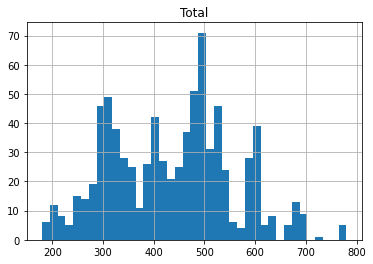

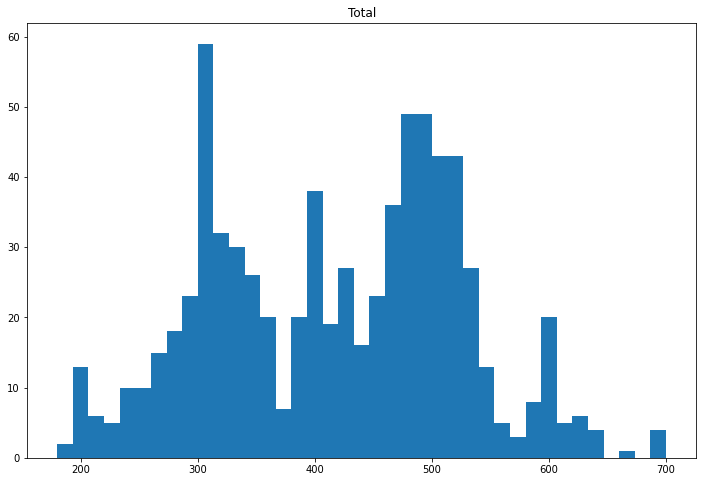

In [35]:
df.hist(
    'Total',
    bins=int( df['Total'].max()/20 ),
)

df[~df['Legendary']].hist(
    'Total',
     bins=int( df['Total'].max()/20 ),
    grid = False,
    figsize=(12,8)
)

<AxesSubplot:>

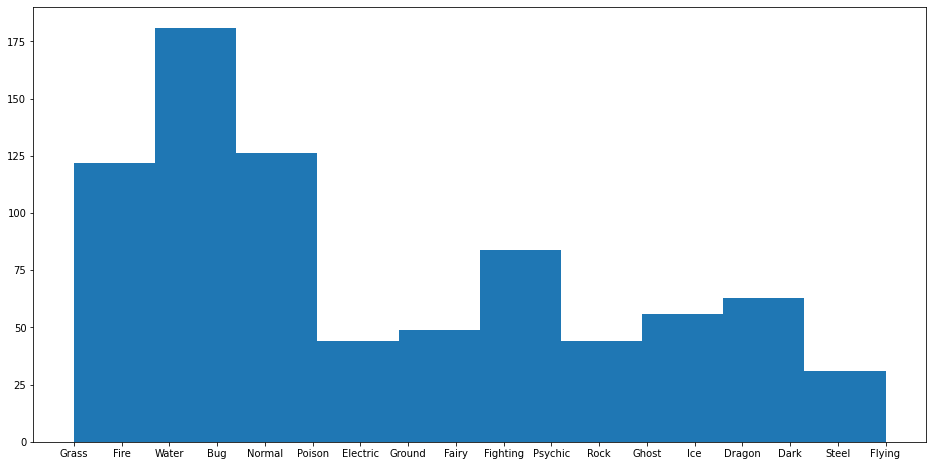

In [36]:
df['Type 1'].hist(
    figsize=(16,8),
    grid=False
)

### 2.5.2. DataFrame's BoxPLot


#### Data Skeness
Data skewness represents the extent to which data values are not symmetrical around the mean. One way of measuring skewness is by studying the mean and median of the distribution.

<img src='https://upload.wikimedia.org/wikipedia/commons/c/cc/Relationship_between_mean_and_median_under_different_skewness.png'>

The skewness of a random variable X is the third standardized moment ${\tilde {\mu }}_{3}$, defined as:
$$ {\tilde {\mu }}_{3} = E\left[ \left( \frac{X-\mu}{\sigma}\right)^3 \right]  \,.$$
If σ is finite, μ is finite too and skewness can be expressed in terms of the non-central moment E[X3] by expanding the previous formula, 
$$ {\tilde {\mu }}_{3} = \frac{E[X^3] - 3 \mu \sigma^2 - \mu^3}{\sigma^3} \,. $$

#### Kurtosis 
The kurtosis is the fourth standardized moment, defined as 
$$ \mathrm{Kurt}[X] = E\left[ \left( \frac{X-\mu}{\sigma}\right)^4 \right]  \,.$$
The exact interpretation of the Pearson measure of kurtosis (or excess kurtosis) used to be disputed, but is now settled. As Westfall notes in 2014[2], "...its only unambiguous interpretation is in terms of tail extremity; i.e., either existing outliers (for the sample kurtosis) or propensity to produce outliers (for the kurtosis of a probability distribution)." 

The logic is simple: Kurtosis is the average (or expected value) of the standardized data raised to the fourth power. Standardized values that are less than 1 (i.e., data within one standard deviation of the mean, where the "peak" would be) contribute virtually nothing to kurtosis, since raising a number that is less than 1 to the fourth power makes it closer to zero. The only data values (observed or observable) that contribute to kurtosis in any meaningful way are those outside the region of the peak; i.e., the outliers. Therefore, kurtosis measures outliers only; it measures nothing about the "peak". 

#### Quartiles, InterQuartireRange (IQR) and Outlier detection

- first quartile $Q_1$: splits off the lowest 25% of data from the highest 75%
- second quantile $Q_2$: cuts data set in half 
- third quartile $Q_3$: splits off the highest 25% of data from the lowest 75% 

The interquartile range (IQR) is a measure of statistical dispersion, which is the spread of the data. It is easily defined as
$$IQR = Q_3 - Q_1\,.$$

<img src='https://gitlab.com/alessandro.bombini.fi/dataviz_labec/-/raw/master/Assets/Images/iqr_skewed_boxplot.png'>

There are methods by which to check for outliers in the discipline of statistics and statistical analysis. In the case of quartiles, the Interquartile Range (IQR) may be used to characterize the data when there may be extremities that skew the data; the interquartile range is a relatively robust statistic (also sometimes called "resistance") compared to the range and standard deviation. There is also a mathematical method to check for outliers and determining "fences", upper and lower limits from which to check for outliers.

After determining the first and third quartiles and the interquartile range as outlined above, then fences are calculated using the following formula: 
$$\text{Lower fence} = Q_1 - \frac{3}{2} \, \cdot IQR \,,$$
$$\text{Upper fence} = Q_3 + \frac{3}{2} \, \cdot IQR \,.$$

The lower fence is the "lower limit" and the upper fence is the "upper limit" of data, and **any data lying outside these defined bounds can be considered an outlier**. 

<img src='https://gitlab.com/alessandro.bombini.fi/dataviz_labec/-/raw/master/Assets/Images/iqr_boxplot.jpg'>

It is common for the lower and upper fences along with the outliers to be represented by a boxplot. For a boxplot, only the vertical heights correspond to the visualized data set while horizontal width of the box is irrelevant. Outliers located outside the fences in a boxplot can be marked as any choice of symbol, such as an "x" or "o". The fences are sometimes also referred to as "whiskers" while the entire plot visual is called a "box-and-whisker" plot. 

<img src='https://gitlab.com/alessandro.bombini.fi/dataviz_labec/-/raw/master/Assets/Images/Boxplot_vs_PDF.png'>

#### The Outliers in particle physics: the 5$\sigma$ threshold

In Particle Physics (and not only), a discovery is claimed if it constitues a deviation from the previous model of more that 5$\sigma$. 

There's an approximately 68 percent chance that a value will fall within the first standard deviation of the distribution – or 1$\sigma$; 

Here's the corresponding approximate percentages for the next sigmas:

2-$\sigma$: 95.5 percent

3-$\sigma$: 99.73 percent

4-$\sigma$: 99.993 percent

5-$\sigma$: 99.99994 percent


For more on this, see [App. B](#5sigma). 


In [37]:
help(df.boxplot)

Help on method boxplot_frame in module pandas.plotting._core:

boxplot_frame(column=None, by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None, backend=None, **kwargs) method of pandas.core.frame.DataFrame instance
    Make a box plot from DataFrame columns.
    
    Make a box-and-whisker plot from DataFrame columns, optionally grouped
    by some other columns. A box plot is a method for graphically depicting
    groups of numerical data through their quartiles.
    The box extends from the Q1 to Q3 quartile values of the data,
    with a line at the median (Q2). The whiskers extend from the edges
    of box to show the range of the data. By default, they extend no more than
    `1.5 * IQR (IQR = Q3 - Q1)` from the edges of the box, ending at the farthest
    data point within that interval. Outliers are plotted as separate dots.
    
    For further details see
    Wikipedia's entry for `boxplot <https://en.wikipedia.org/wiki/Box_plot>`_.
  

<AxesSubplot:title={'center':'Total'}, xlabel='Generation'>

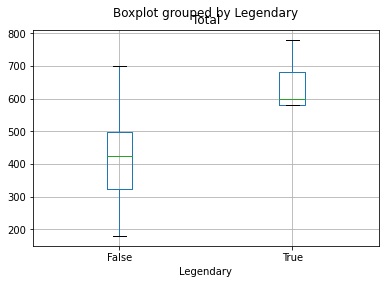

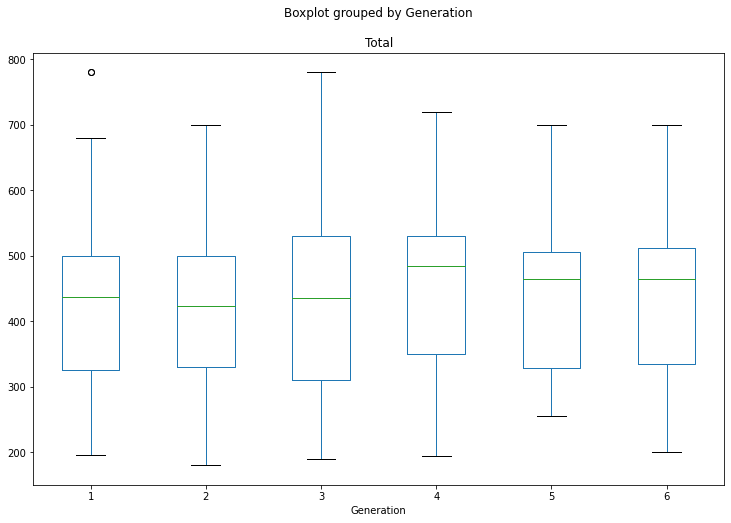

In [38]:
df.boxplot(
    column='Total',
    by='Legendary'
)

df.boxplot(
    column='Total',
    by='Generation',
    figsize=(12,8),
    grid=False
)

<AxesSubplot:>

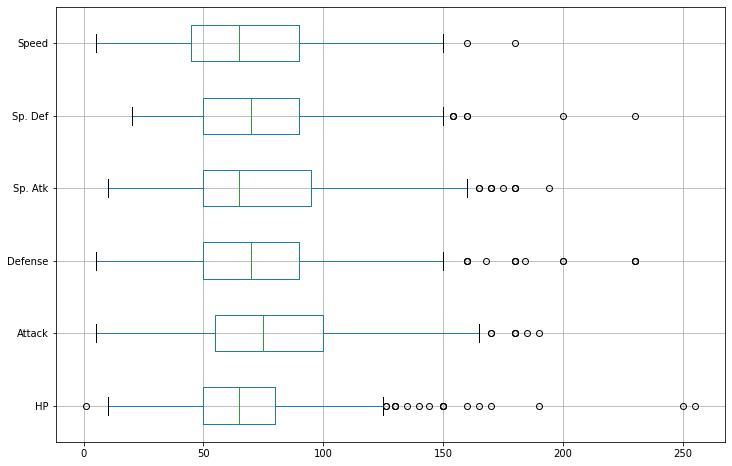

In [39]:
# Change alignment
df.boxplot(
    column=list(df.columns[5:-2]),
    figsize=(12,8),
    vert=False
)

array([[<AxesSubplot:title={'center':'HP'}, xlabel='Type 1'>,
        <AxesSubplot:title={'center':'Attack'}, xlabel='Type 1'>],
       [<AxesSubplot:title={'center':'Defense'}, xlabel='Type 1'>,
        <AxesSubplot:title={'center':'Sp. Atk'}, xlabel='Type 1'>],
       [<AxesSubplot:title={'center':'Sp. Def'}, xlabel='Type 1'>,
        <AxesSubplot:title={'center':'Speed'}, xlabel='Type 1'>]],
      dtype=object)

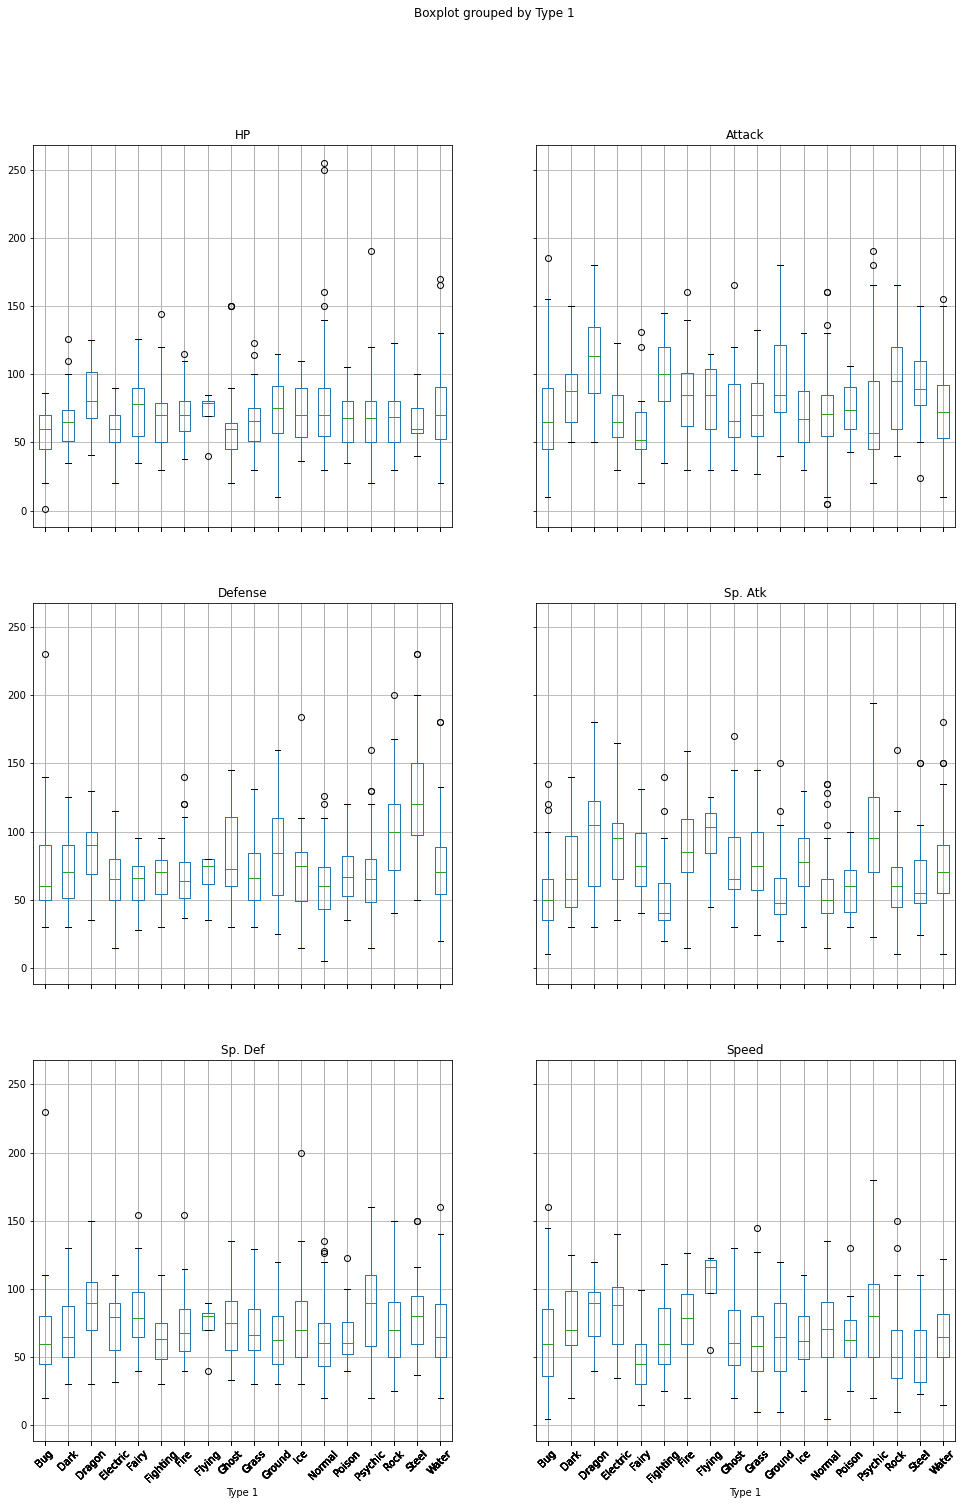

In [40]:
df.boxplot(
    column=list(df.columns[5:-2]),
    figsize=(16,24),
    by='Type 1',
    rot=45 # rot angle of labels
)

array([[<AxesSubplot:title={'center':'HP'}, xlabel='Type 1'>,
        <AxesSubplot:title={'center':'Attack'}, xlabel='Type 1'>],
       [<AxesSubplot:title={'center':'Defense'}, xlabel='Type 1'>,
        <AxesSubplot:title={'center':'Sp. Atk'}, xlabel='Type 1'>],
       [<AxesSubplot:title={'center':'Sp. Def'}, xlabel='Type 1'>,
        <AxesSubplot:title={'center':'Speed'}, xlabel='Type 1'>]],
      dtype=object)

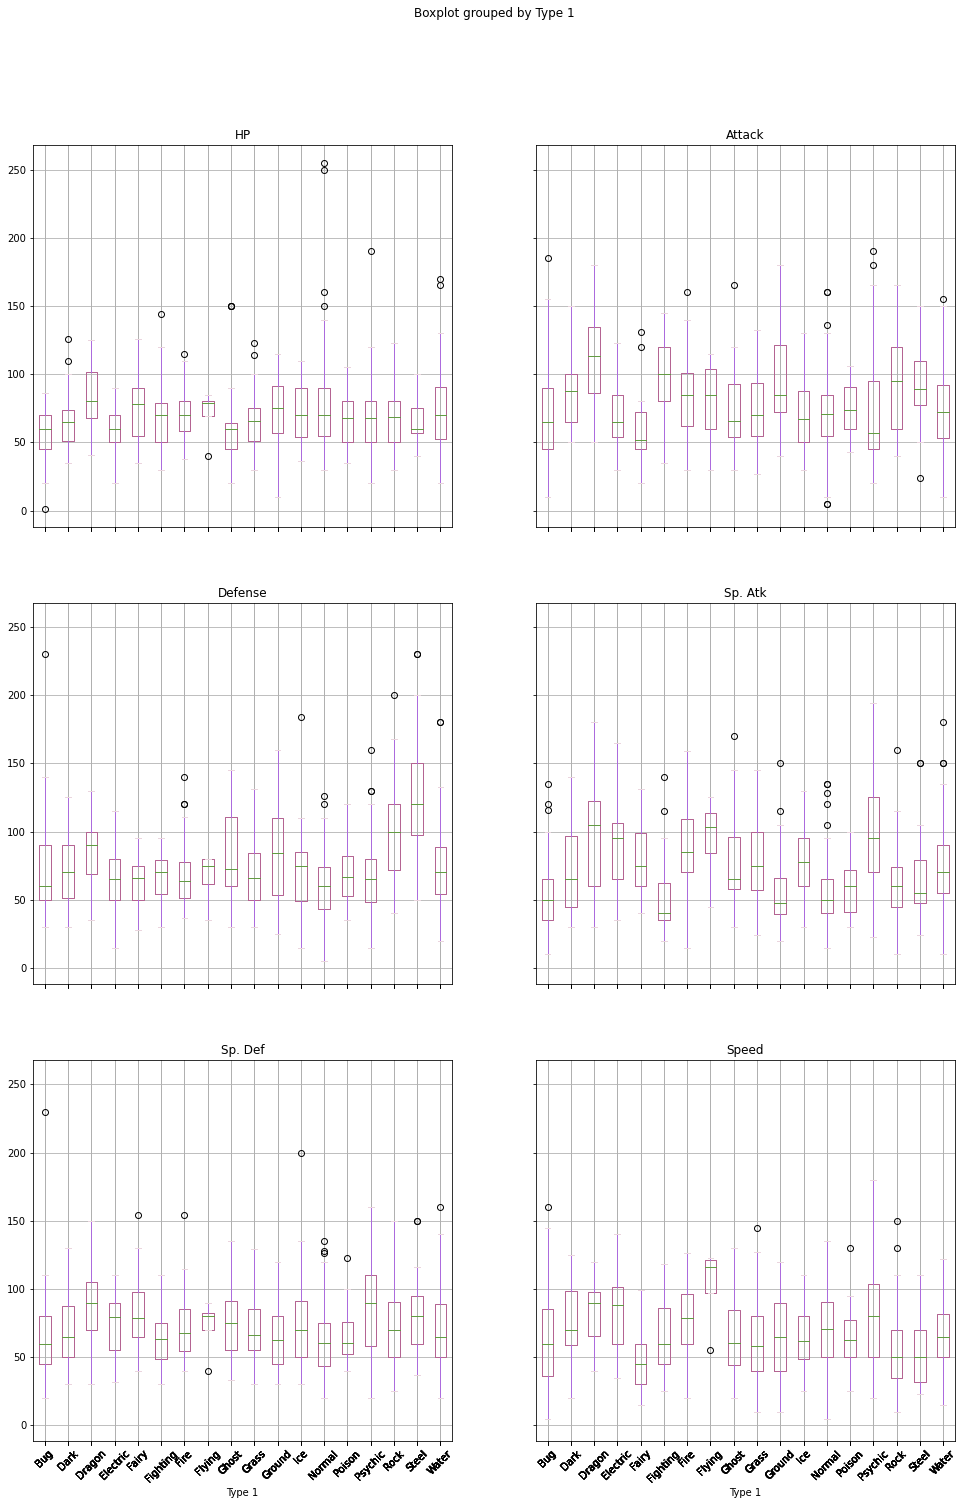

In [41]:
# colors generated randonmly by https://commentpicker.com/random-color-generator.php
color_boxplot = {
    "boxes": "#B46492",
    "whiskers": "#AC6BDD",
    "medians": "#629C42",
    "caps": "#EAD5DE",
}

df.boxplot(
    column=list(df.columns[5:-2]),
    figsize=(16,24),
    by='Type 1',
    #vert=False,
    color=color_boxplot,
    rot=45 # rot angle of labels
)

### 2.5.3. DataFrame's other plots

In [42]:
help(df.plot)

Help on PlotAccessor in module pandas.plotting._core object:

class PlotAccessor(pandas.core.base.PandasObject)
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |      - 'pie' : pie plot
 |      - 'sc

#### Histograms

<AxesSubplot:xlabel='Frequency'>

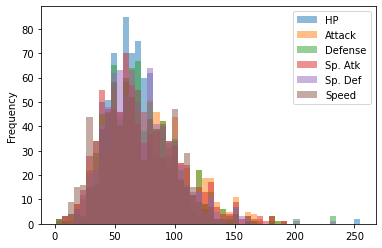

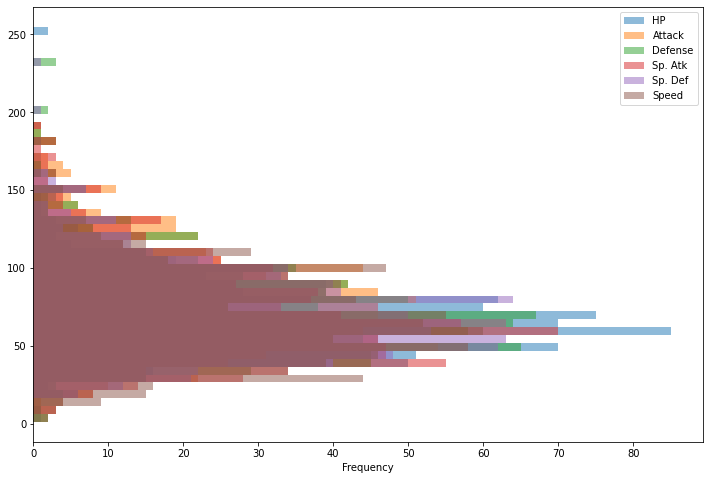

In [43]:
df[df.columns[5:-2]].plot.hist(
    bins=50,
    alpha=0.5
)

df[df.columns[5:-2]].plot.hist(
    bins=50,
    alpha=0.5,
    orientation="horizontal",
    figsize=(12,8)
)

#### Area

<AxesSubplot:>

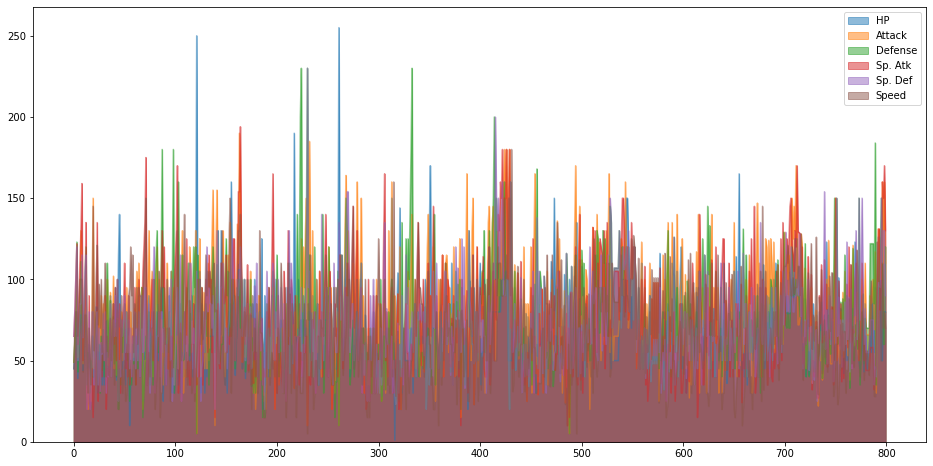

In [44]:
df[df.columns[5:-2]].plot.area(
    figsize=(16,8),
    stacked=False
)

#### Hexagonal Bin plot

<AxesSubplot:xlabel='Attack', ylabel='Sp. Atk'>

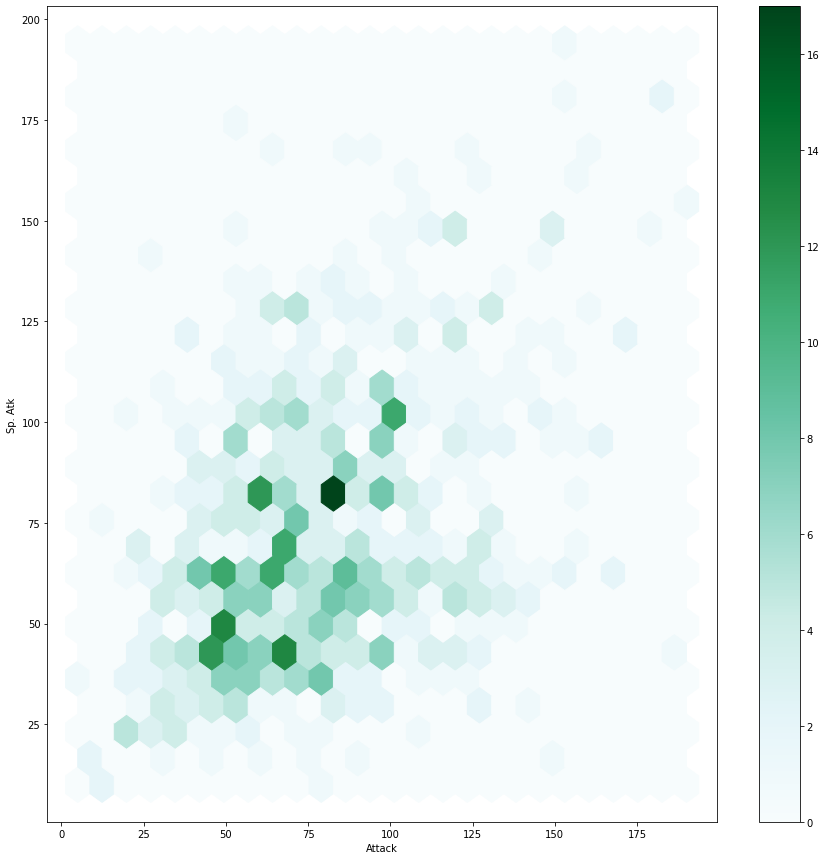

In [45]:
df.plot.hexbin(
    x='Attack',
    y='Sp. Atk',
    figsize=(15,15),
    gridsize=25, #  it controls the number of hexagons in the x-direction, and defaults to 100. A larger gridsize means more, smaller bins.
    sharex=False  # to show X label
)

<AxesSubplot:xlabel='Attack', ylabel='Sp. Atk'>

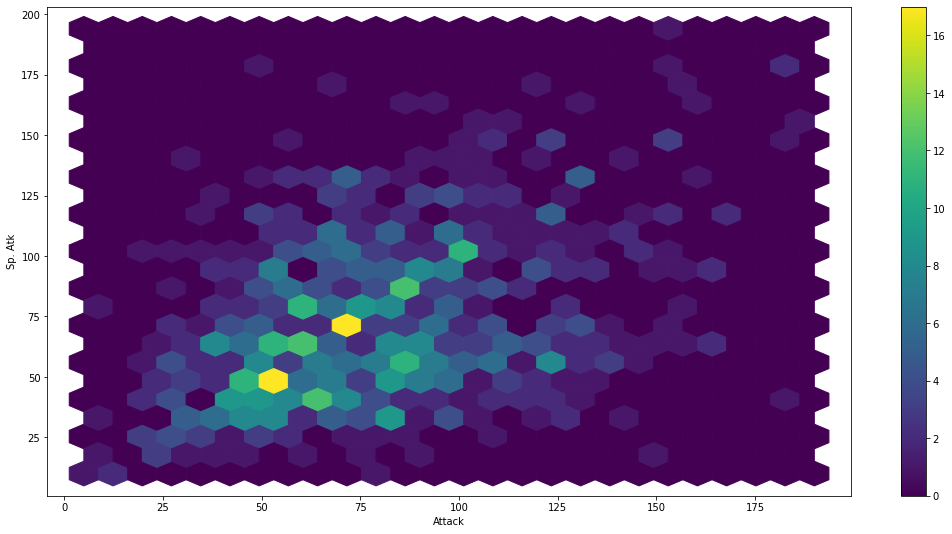

In [46]:
df.plot.hexbin(
    x='Attack',
    y='Sp. Atk',
    figsize=(18,9),
    gridsize=(25,12), #  it controls the number of hexagons in the x-direction, and defaults to 100. A larger gridsize means more, smaller bins.
    cmap='viridis',
    sharex=False  # to show X label
)

#### Pie plot

<AxesSubplot:ylabel='Type 1'>

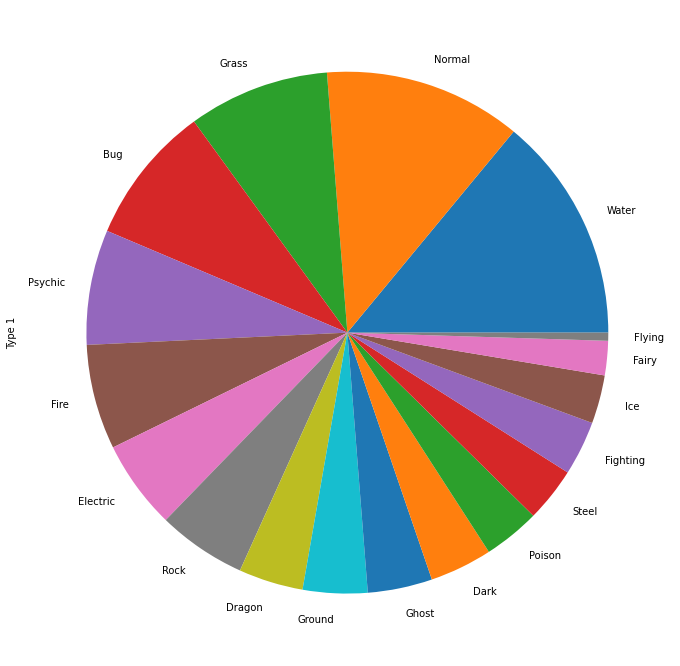

In [47]:
df_type_counts.plot.pie(
    y='Type 1',
    figsize=(12,12), 
    legend=False
)

array([<AxesSubplot:ylabel='Type 1'>, <AxesSubplot:ylabel='Type 2'>],
      dtype=object)

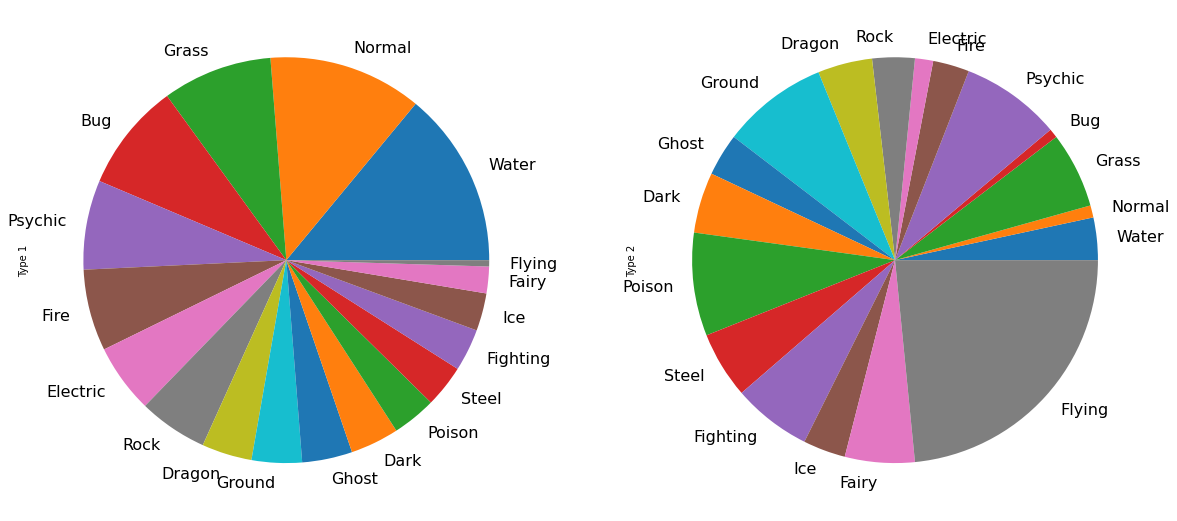

In [48]:
df_type_counts.plot.pie(
    subplots=True,
    figsize=(20,10),
    fontsize=16,
    legend=False
)

## Appendix

### A. Scrape WikiPedia table to CSV with Pandas

-----------
[1] https://towardsdatascience.com/all-pandas-read-html-you-should-know-for-scraping-data-from-html-tables-a3cbb5ce8274

In [49]:
help(pd.read_html)

Help on function read_html in module pandas.io.html:

read_html(io:Union[str, pathlib.Path, IO[~AnyStr]], match:Union[str, Pattern[~AnyStr]]='.+', flavor:Union[str, NoneType]=None, header:Union[int, Sequence[int], NoneType]=None, index_col:Union[int, Sequence[int], NoneType]=None, skiprows:Union[int, Sequence[int], slice, NoneType]=None, attrs:Union[Dict[str, str], NoneType]=None, parse_dates:bool=False, thousands:Union[str, NoneType]=',', encoding:Union[str, NoneType]=None, decimal:str='.', converters:Union[Dict, NoneType]=None, na_values=None, keep_default_na:bool=True, displayed_only:bool=True) -> List[pandas.core.frame.DataFrame]
    Read HTML tables into a ``list`` of ``DataFrame`` objects.
    
    Parameters
    ----------
    io : str, path object or file-like object
        A URL, a file-like object, or a raw string containing HTML. Note that
        lxml only accepts the http, ftp and file url protocols. If you have a
        URL that starts with ``'https'`` you might try rem

In [50]:
dfs = pd.read_html(
    'https://it.wikipedia.org/wiki/Elezioni_politiche_italiane_del_2018#Risultati',
)

print(f'Type of dfs: {type(dfs)}')

for index, df_in in enumerate(dfs):
    print(f'\nDataFrane n° {index}:')
    display(df_in)

Type of dfs: <class 'list'>

DataFrane n° 0:


Elezioni politiche italiane del 2018  \
0                                 Stato   
1                                  Data   
2                           Legislatura   
3                      Legge elettorale   
4                             Affluenza   
5                                   NaN   
6                            Coalizione   
7                   Camera dei deputati   
8                                  Voti   
9                                 Seggi   
10                         Differenza %   
11                     Differenza seggi   
12              Senato della Repubblica   
13                                 Voti   
14                                Seggi   
15                         Differenza %   
16                     Differenza seggi   
17                                  NaN   
18                                  NaN   
19                              Governi   
20                  Conte I (2018-2019)   
21                 Conte II (2019-2021)   
22                       Draghi (2021-)   
23                                 2013   

   Elezioni politiche italiane del 2018.1  \
0                                   Stato   
1                                    Data   
2                             Legislatura   
3                        Legge elettorale   
4                               Affluenza   
5                                     NaN   
6                              Coalizione   
7                     Camera dei deputati   
8                                    Voti   
9                                   Seggi   
10                           Differenza %   
11                       Differenza seggi   
12                Senato della Repubblica   
13                                   Voti   
14                                  Seggi   
15                           Differenza %   
16                       Differenza seggi   
17                                    NaN   
18                                    NaN   
19                                Governi   
20                    Conte I (2018-2019)   
21                   Conte II (2019-2021)   
22                         Draghi (2021-)   
23                                   2013   

   Elezioni politiche italiane del 2018.2  \
0                                  Italia   
1                            4 marzo 2018   
2                       XVIII legislatura   
3                            Legge Rosato   
4                    72,93[1] % ( 2,31 %)   
5                                     NaN   
6                           Centro-destra   
7                     Camera dei deputati   
8                    12 409 98137,00[1] %   
9                               265 / 630   
10                                 7,82 %   
11                                    141   
12                Senato della Repubblica   
13                   11 570 66137,50[1] %   
14                              137 / 315   
15                                 6,77 %   
16                                     21   
17                                    NaN   
18                                    NaN   
19                                Governi   
20                    Conte I (2018-2019)   
21                   Conte II (2019-2021)   
22                         Draghi (2021-)   
23                                   2013   

   Elezioni politiche italiane del 2018.3  \
0                                  Italia   
1                            4 marzo 2018   
2                       XVIII legislatura   
3                            Legge Rosato   
4                    72,93[1] % ( 2,31 %)   
5                                     NaN   
6                      Movimento 5 Stelle   
7                     Camera dei deputati   
8                    10 945 41132,68[1] %   
9                               227 / 630   
10                                 7,12 %   
11                                    119   
12                Senato della Repubblica   
13                    9 931 04132,22[1] %   



DataFrane n° 1:


0                                                  1
0 NaN  Lo stesso argomento in dettaglio: Legge eletto...


DataFrane n° 2:


Camera dei deputati                        \
                  Circoscrizione     Seggi prop.         
                  Circoscrizione Collegi plurin. Seggi   
0                        Abruzzo               2     9   
1                     Basilicata               1     4   
2                       Calabria               2    12   
3                     Campania 1               3    20   
4                     Campania 2               3    18   
5                 Emilia-Romagna               4    28   
6          Friuli-Venezia Giulia               1     8   
7                        Lazio 1               3    24   
8                        Lazio 2               2    13   
9                        Liguria               2    10   
10                   Lombardia 1               4    25   
11                   Lombardia 2               2    14   
12                   Lombardia 3               2    15   
13                   Lombardia 4               2    11   
14                        Marche               2    10   
15                        Molise               1     1   
16                    Piemonte 1               2    14   
17                    Piemonte 2               2    14   
18                        Puglia               4    26   
19                      Sardegna               2    11   
20                     Sicilia 1               3    16   
21                     Sicilia 2               3    17   
22                       Toscana               4    24   
23  Trentino-Alto Adige/Südtirol               1     5   
24                        Umbria               1     6   
25  Valle d'Aosta/Vallée d'Aoste               0     0   
26                      Veneto 1               2    12   
27                      Veneto 2               3    19   
28                        Estero               –    12   
29                        Totale              63   398   

                                                      Senato della Repubblica  \
   Seggi magg.(collegi unin.) Seggi complessivi                Circoscrizione   
   Seggi magg.(collegi unin.) Seggi complessivi                Circoscrizione   
0                           5                14                       Abruzzo   
1                           2                 6                    Basilicata   
2                           8                20                      Calabria   
3                          12                32                      Campania   
4                          10                28                      Campania   
5                          17                45                Emilia-Romagna   
6                           5                13         Friuli-Venezia Giulia   
7                          14                38                         Lazio   
8                           7                20                         Lazio   
9                           6                16                       Liguria   
10                         15                40                     Lombardia   
11                          8                22                     Lombardia   
12                          8                23                     Lombardia   
13                          6                17                     Lombardia   
14                          6                16                        Marche   
15                          2                 3                        Molise   
16                          9                23                      Piemonte   
17                          8                22                      Piemonte   
18                         16                42                        Puglia   
19                          6                17                      Sardegna   
20                          9                25                       Sicilia   
21                         10                27                       Sicilia   
22                         14                38                       Tos


DataFrane n° 3:


0                                                  1
0 NaN  Lo stesso argomento in dettaglio: Governo Lett...


DataFrane n° 4:


0                                                  1
0 NaN  Questa voce o sezione sull'argomento elezioni ...


DataFrane n° 5:


Liste                                       \
   Liste                              Liste.1   
0    NaN          Coalizione di centro-destra   
1    NaN          Coalizione di centro-destra   
2    NaN          Coalizione di centro-destra   
3    NaN          Coalizione di centro-destra   
4    NaN          Coalizione di centro-destra   
5    NaN        Coalizione di centro-sinistra   
6    NaN        Coalizione di centro-sinistra   
7    NaN        Coalizione di centro-sinistra   
8    NaN        Coalizione di centro-sinistra   
9    NaN        Coalizione di centro-sinistra   
10   NaN                   Movimento 5 Stelle   
11   NaN                      Liberi e Uguali   
12   NaN                     CasaPound Italia   
13   NaN                    Potere al Popolo!   
14   NaN             Il Popolo della Famiglia   
15   NaN                 Italia agli Italiani   
16   NaN                 Partito Valore Umano   
17   NaN                    Partito Comunista   
18   NaN  Partito Repubblicano Italiano - ALA   

                                                       \
                                              Liste.2   
0                                        Forza Italia   
1                                                Lega   
2                                   Fratelli d'Italia   
3                              Noi con l'Italia - UDC   
4   Altre: FI-FdI-Nuova Valle d'Aosta (circ. Valle...   
5                                 Partito Democratico   
6                                             +Europa   
7                                     Civica Popolare   
8                               Italia Europa Insieme   
9   Altre: SVP - PATT (circ. Trentino-Alto Adige/S...   
10                                 Movimento 5 Stelle   
11                                    Liberi e Uguali   
12                                   CasaPound Italia   
13                                  Potere al Popolo!   
14                           Il Popolo della Famiglia   
15                               Italia agli Italiani   
16                               Partito Valore Umano   
17                                  Partito Comunista   
18                Partito Repubblicano Italiano - ALA   

                                               Leader  \
                                               Leader   
0                                   Silvio Berlusconi   
1                                      Matteo Salvini   
2                                      Giorgia Meloni   
3                                      Raffaele Fitto   
4   Altre: FI-FdI-Nuova Valle d'Aosta (circ. Valle...   
5                                        Matteo Renzi   
6                                         Emma Bonino   
7                                   Beatrice Lorenzin   
8                                    Giulio Santagata   
9   Altre: SVP - PATT (circ. Trentino-Alto Adige/S...   
10                                      Luigi Di Maio   
11                                      Pietro Grasso   
12                                  Simone Di Stefano   
13                                     Viola Carofalo   
14                                     Mario Adinolfi   
15                                      Roberto Fiore   
16                                      Pasquale Ruga   
17                                        Marco Rizzo   
18                                      Denis Verdini   

                                         Collocazione  \
                                         Collocazione   
0                                       Centro-destra   
1                                              Destra   
2                                      Estrema destra   
3                                              Centro   
4   Altre: FI-FdI-Nuova Valle d'Aosta (circ. Valle...   
5                                     Centro-sinistra   
6                                              Centro   
7                                              Centro   
8      


DataFrane n° 6:


0                                                  1
0 NaN  Lo stesso argomento in dettaglio: Coalizione d...


DataFrane n° 7:


0                                                  1
0 NaN  Lo stesso argomento in dettaglio: Coalizione d...


DataFrane n° 8:


0                                                  1
0 NaN  Lo stesso argomento in dettaglio: Sondaggi sul...


DataFrane n° 9:


Centro-destra                       Centro-sinistra               M5S LeU  \
             FI Lega FdI Altri Totale              PD Altri Totale  M5S LeU   
0           164  134  46    23    367             228    45    274  281  57   

  Altri  
  Altri  
0    23


DataFrane n° 10:


Istituto  \
                                            Istituto   
0                                        Piepoli[91]   
1                                      Euromedia[92]   
2                                            Ixè[94]   
3                                       YouTrend[88]   
4                                          Ipsos[93]   
5                                      EMG Acqua[95]   
6  * esclusi seggi circoscrizione Estero (12)** e...   

                                       Centro-destra  \
                                                  FI   
0                                                  -   
1                                                  -   
2                                                147   
3                                                130   
4                                    119-139(Me 129)   
5                                    108-138(Me 123)   
6  * esclusi seggi circoscrizione Estero (12)** e...   

                                                      \
                                                Lega   
0                                                  -   
1                                                  -   
2                                                 96   
3                                                107   
4                                     91-111(Me 101)   
5                                     91-121(Me 106)   
6  * esclusi seggi circoscrizione Estero (12)** e...   

                                                      \
                                                 FdI   
0                                                  -   
1                                                  -   
2                                                 39   
3                                                 39   
4                                       34-44(Me 39)   
5                                       30-50(Me 40)   
6  * esclusi seggi circoscrizione Estero (12)** e...   

                                                      \
                                               Altri   
0                                                  -   
1                                                  -   
2                                                 15   
3                                                 12   
4                                       11-17(Me 14)   
5                                        5-15(Me 10)   
6  * esclusi seggi circoscrizione Estero (12)** e...   

                                                      \
                                              Totale   
0                                                281   
1                                                273   
2                                                297   
3                                                288   
4                                    270-296(Me 283)   
5                                    259-299(Me 279)   
6  * esclusi seggi circoscrizione Estero (12)** e...   

                                     Centro-sinistra  \
                                                  PD   
0                                                  -   
1                                                  -   
2                                                119   
3                                                143   
4                                    126-146(Me 136)   
5                                    129-169(Me 149)   
6  * esclusi seggi circoscrizione Estero (12)** e...   

                                                      \
                                               Altri   
0                                                  -   
1                                                  -   
2                                                 22   
3                                                  7   
4                                       16-28(Me 22)   
5                                          3-7(Me 5)   
6  * esclusi seggi circoscrizione Estero (12)** e...   

    


DataFrane n° 11:


Area Camera dei deputati                                         \
     Area    Corpo elettorale Affluenza                                
     Area    Corpo elettorale   h 12:00 h 19:00 h 23:00 Var. da 2013   
0  Italia          46 604 925    19,43%  58,40%  72,93%       -2,31%   
1  Estero           4 177 725       NaN     NaN     NaN          NaN   

            Senato                         
  Corpo elettorale Affluenza               
  Corpo elettorale   h 23:00 Var. da 2013  
0       42 871 428    72,99%       -2,27%  
1        3 791 774       NaN          NaN


DataFrane n° 12:


0                                                  1
0 NaN  Lo stesso argomento in dettaglio: Elezioni pol...


DataFrane n° 13:


0   \
0                                                 NaN   
1                                               Liste   
2                                               Liste   
3                                               Liste   
4                                                 NaN   
5                                                 NaN   
6                                                 NaN   
7                                                 NaN   
8                                                 NaN   
9                                                 NaN   
10                                                NaN   
11                                                NaN   
12                                                NaN   
13                                                NaN   
14                                                NaN   
15                                                NaN   
16                                                NaN   
17                                                NaN   
18                                                NaN   
19                                                NaN   
20                                                NaN   
21                                                NaN   
22                                                NaN   
23                                                NaN   
24                                             Totale   
25  I voti includono le preferenze date ai soli ca...   

                                                   1   \
0                                                 NaN   
1                                               Liste   
2                                               Liste   
3                                               Liste   
4                         Coalizione di centro-destra   
5                         Coalizione di centro-destra   
6                         Coalizione di centro-destra   
7                         Coalizione di centro-destra   
8                         Coalizione di centro-destra   
9                                  Movimento 5 Stelle   
10                      Coalizione di centro-sinistra   
11                      Coalizione di centro-sinistra   
12                      Coalizione di centro-sinistra   
13                      Coalizione di centro-sinistra   
14                      Coalizione di centro-sinistra   
15                      Coalizione di centro-sinistra   
16                                    Liberi e Uguali   
17                                  Potere al Popolo!   
18                                   CasaPound Italia   
19                           Il Popolo della Famiglia   
20                          Italia agli Italiani[109]   
21                                  Partito Comunista   
22                                              Altre   
23                                                NaN   
24                                             Totale   
25  I voti includono le preferenze date ai soli ca...   

                                                   2   \
0                                                 NaN   
1                                               Liste   
2                                               Liste   
3                                               Liste   
4                                                 NaN   
5                                                 NaN   
6                                                 NaN   
7                                                 NaN   
8                                              Totale   
9                                  Movimento 5 Stelle   
10                                                NaN   
11                                                NaN   
12                                                NaN   
13                                                NaN   
14                                                NaN   
15                                             Totale   
16


DataFrane n° 14:


Liste                                                     \
    Liste                                                      
    Liste                                            Liste.1   
0     NaN                                 Movimento 5 Stelle   
1     NaN  Vallée d'Aoste - Tradition et Progrès(PD-UV-UV...   
2     NaN  Per Tutti - Pour Tous - Pe Tcheut(ALPE-Stella ...   
3     NaN                                               Lega   
4     NaN  Forza Italia-Fratelli d'Italia-Nuova Valle d'A...   
5     NaN                                              Altre   
6  Totale                                             Totale   

  Camera dei deputati              Senato della Repubblica               
           Preferenze        Seggi              Preferenze        Seggi  
                 Voti      % Seggi                    Voti      % Seggi  
0              15 999   2410     1                  14 398   2324     0  
1              14 429   2174     0                  15 958   2576     1  
2              12 118   1825     0                   9 659   1559     0  
3              11 588   1745     0                  11 004   1776     0  
4               5 533    833     0                   5 223    843     0  
5               6 703   1009     0                   5 696    917     0  
6              66 370  10000     1                  61 938  10000     1


DataFrane n° 15:


Liste                                               Camera dei deputati  \
     Liste                                       Liste.1                Voti   
0      NaN                           Partito Democratico             297 153   
1      NaN  Lega - Forza Italia - Fratelli d'Italia[110]             240 702   
2      NaN                            Movimento 5 Stelle             197 346   
3      NaN     Movimento Associativo Italiani all'Estero             107 236   
4      NaN         Unione Sudamericana Emigrati Italiani              68 291   
5      NaN                               Liberi e Uguali              64 523   
6      NaN                                       +Europa              64 350   
7      NaN                               Civica Popolare              32 071   
8      NaN               Unione Tricolore America Latina              25 555   
9      NaN                        Noi con l'Italia - UDC              12 396   
10     NaN                       Movimento delle libertà              10 590   
11     NaN           Partito Repubblicano Italiano - ALA               2 270   
12     NaN                         Free Flights to Italy                 946   
13  Totale                                        Totale           1 123 429   

                Senato della Repubblica               
        % Seggi                    Voti      % Seggi  
0    2645     5                 279 489   2708     2  
1    2143     3                 226 885   2198     2  
2    1757     1                 182 715   1760     0  
3     955     1                 110 879   1074     1  
4     608     1                  68 223    661     1  
5     574     0                  57 761    560     0  
6     573     1                  55 625    539     0  
7     285     0                  32 660    316     0  
8     227     0                    n.p.      -     -  
9     110     0                  10 856    105     0  
10     94     0                   6 960    067     0  
11     20     0                    n.p.      -     -  
12      8     0                    n.p.      -     -  
13  10000    12               1 032 063  10000     6


DataFrane n° 16:


Camera dei deputati   Camera dei deputati.1  Camera dei deputati.2  \
0                      NaN                     NaN                    NaN   
1       Movimento 5 Stelle      Movimento 5 Stelle                    NaN   
2                     Lega                    Lega                    NaN   
3      Partito Democratico     Partito Democratico                    NaN   
4             Forza Italia            Forza Italia                    NaN   
5        Fratelli d'Italia       Fratelli d'Italia                    NaN   
6          Liberi e Uguali         Liberi e Uguali                    NaN   
7   Noi con l'Italia - UDC  Noi con l'Italia - UDC                    NaN   
8               SVP - PATT              SVP - PATT                    NaN   
9                  +Europa                 +Europa                    NaN   
10         Civica Popolare         Civica Popolare                    NaN   
11   Italia Europa Insieme   Italia Europa Insieme                    NaN   
12                    MAIE                    MAIE                    NaN   
13                    USEI                    USEI                    NaN   
14                     NaN                     NaN                    NaN   

   Camera dei deputati.3 Camera dei deputati.4  
0                    NaN                   NaN  
1                227/630               227/630  
2                125/630               125/630  
3                112/630               112/630  
4                104/630               104/630  
5                 32/630                32/630  
6                 14/630                14/630  
7                  4/630                 4/630  
8                  4/630                 4/630  
9                  3/630                 3/630  
10                 2/630                 2/630  
11                 1/630                 1/630  
12                 1/630                 1/630  
13                 1/630                 1/630  
14                   NaN                   NaN


DataFrane n° 17:


Senato della Repubblica Senato della Repubblica.1  \
0                      NaN                       NaN   
1       Movimento 5 Stelle        Movimento 5 Stelle   
2                     Lega                      Lega   
3             Forza Italia              Forza Italia   
4      Partito Democratico       Partito Democratico   
5        Fratelli d'Italia         Fratelli d'Italia   
6   Noi con l'Italia - UDC    Noi con l'Italia - UDC   
7          Liberi e Uguali           Liberi e Uguali   
8               SVP - PATT                SVP - PATT   
9                  +Europa                   +Europa   
10         Civica Popolare           Civica Popolare   
11   Italia Europa Insieme     Italia Europa Insieme   
12        Union Valdôtaine          Union Valdôtaine   
13                    MAIE                      MAIE   
14                    USEI                      USEI   
15                     NaN                       NaN   

    Senato della Repubblica.2 Senato della Repubblica.3  \
0                         NaN                       NaN   
1                         NaN                   111/314   
2                         NaN                    58/314   
3                         NaN                    57/314   
4                         NaN                    53/314   
5                         NaN                    18/314   
6                         NaN                     4/314   
7                         NaN                     4/314   
8                         NaN                     3/314   
9                         NaN                     1/314   
10                        NaN                     1/314   
11                        NaN                     1/314   
12                        NaN                     1/314   
13                        NaN                     1/314   
14                        NaN                     1/314   
15                        NaN                       NaN   

   Senato della Repubblica.4  
0                        NaN  
1                    111/314  
2                     58/314  
3                     57/314  
4                     53/314  
5                     18/314  
6                      4/314  
7                      4/314  
8                      3/314  
9                      1/314  
10                     1/314  
11                     1/314  
12                     1/314  
13                     1/314  
14                     1/314  
15                       NaN


DataFrane n° 18:


Camera dei deputati Camera dei deputati.1  Camera dei deputati.2  \
0                 NaN                   NaN                    NaN   
1       Centro-destra         Centro-destra                    NaN   
2  Movimento 5 Stelle    Movimento 5 Stelle                    NaN   
3     Centro-sinistra       Centro-sinistra                    NaN   
4     Liberi e Uguali       Liberi e Uguali                    NaN   
5                MAIE                  MAIE                    NaN   
6                USEI                  USEI                    NaN   
7                 NaN                   NaN                    NaN   

  Camera dei deputati.3 Camera dei deputati.4  
0                   NaN                   NaN  
1               265/630               265/630  
2               227/630               227/630  
3               122/630               122/630  
4                14/630                14/630  
5                 1/630                 1/630  
6                 1/630                 1/630  
7                   NaN                   NaN


DataFrane n° 19:


Senato della Repubblica Senato della Repubblica.1  \
0                     NaN                       NaN   
1           Centro-destra             Centro-destra   
2      Movimento 5 Stelle        Movimento 5 Stelle   
3         Centro-sinistra           Centro-sinistra   
4         Liberi e Uguali           Liberi e Uguali   
5                    MAIE                      MAIE   
6                    USEI                      USEI   
7                     NaN                       NaN   

   Senato della Repubblica.2 Senato della Repubblica.3  \
0                        NaN                       NaN   
1                        NaN                   137/314   
2                        NaN                   111/314   
3                        NaN                    60/314   
4                        NaN                     4/314   
5                        NaN                     1/314   
6                        NaN                     1/314   
7                        NaN                       NaN   

  Senato della Repubblica.4  
0                       NaN  
1                   137/314  
2                   111/314  
3                    60/314  
4                     4/314  
5                     1/314  
6                     1/314  
7                       NaN


DataFrane n° 20:


Lista/Età 18-30 31-44 45-64 Oltre 64
0   Movimento 5 Stelle   44%   40%   30%      19%
1  Partito Democratico   15%   15%   18%      27%
2                 Lega   13%   17%   19%      18%
3         Forza Italia   11%   10%   16%      18%
4    Fratelli d'Italia    3%    5%    5%       4%
5      Liberi e Uguali    2%    3%    3%       4%
6              +Europa    4%    2%    2%       2%
7                Altri    8%    8%    7%       8%


DataFrane n° 21:


Lista/Titolo di studio Laurea Diploma Scuola elementare
0     Movimento 5 Stelle    30%     37%               24%
1    Partito Democratico    22%     17%               19%
2                   Lega    13%     18%               22%
3           Forza Italia    10%     13%               24%
4      Fratelli d'Italia     5%      5%                3%
5        Liberi e Uguali     4%      3%                2%
6                +Europa     5%      2%                1%
7                  Altri    11%      5%                5%


DataFrane n° 22:


Lista/Professione Lav. Aut. Dip.Publ. Dip.Priv. Precario Disoccupato  \
0   Movimento 5 Stelle       33%       32%       34%      39%         50%   
1  Partito Democratico       16%       25%       18%      14%          8%   
2                 Lega       18%       12%       20%      19%         16%   
3         Forza Italia       15%       11%       11%      11%         10%   
4    Fratelli d'Italia        4%        6%        3%       6%          4%   
5      Liberi e Uguali        3%        4%        3%       4%          2%   
6              +Europa        3%        3%        2%       3%          3%   
7                Altri        8%        7%        9%       4%          7%   

  Pensionato Casalinga Studente  
0        20%       31%      49%  
1        27%       14%      14%  
2        18%       19%      12%  
3        18%       22%       7%  
4         4%        5%       2%  
5         4%        2%       3%  
6         3%        2%       4%  
7         6%        5%       9%


DataFrane n° 23:


V · D · M Elezioni e referendum in Italia  \
0                                    Elezioni europee   
1                                  Elezioni politiche   
2                                 Elezioni suppletive   
3                                  Elezioni regionali   
4                             Elezioni amministrative   
5                                          Referendum   
6                                       istituzionale   
7                                      costituzionali   
8                                          abrogativi   
9                                        di indirizzo   
10  Elezioni istituzionali in Italia · Elezioni re...   

          V · D · M Elezioni e referendum in Italia.1  
0   1979 · 1984 · 1989 · 1994 · 1999 · 2004 · 2009...  
1   1861 · 1865 · 1867 · 1870 · 1874 · 1876 · 1880...  
2                           2019 · 2020 · 2021 · 2022  
3   1947 · 1948 · 1949 · 1951 · 1952 · 1953 · 1954...  
4   1914 · 1920 · 1922 · 1923 · 1946 · 1947 · 1948...  
5   istituzionale1946costituzionali2001 · 2006 · 2...  
6                                                1946  
7                           2001 · 2006 · 2016 · 2020  
8   1974 · 1978 · 1981 · 1985 · 1987 · 1990 · 1991...  
9                                                1989  
10  Elezioni istituzionali in Italia · Elezioni re...


DataFrane n° 24:


0                                                  1
0   istituzionale                                               1946
1  costituzionali                          2001 · 2006 · 2016 · 2020
2      abrogativi  1974 · 1978 · 1981 · 1985 · 1987 · 1990 · 1991...
3    di indirizzo                                               1989


DataFrane n° 25:


0                        1
0  Portale Politica  Portale Storia d'Italia

In [51]:
elect_dfs = pd.read_html(
    'https://it.wikipedia.org/wiki/Elezioni_politiche_italiane_del_2018_(circoscrizioni_della_Camera_dei_deputati)'
)

elect_dfs.append(
    'https://it.wikipedia.org/wiki/Elezioni_politiche_italiane_del_2018_(circoscrizioni_del_Senato_della_Repubblica)'
)

print(f'Type of dfs: {type(elect_dfs)}')

for index, df_in in enumerate(elect_dfs):
    print(f'\nDataFrane n° {index}:')
    display(df_in)

Type of dfs: <class 'list'>

DataFrane n° 0:


Piemonte 1         Piemonte 1.1
0                  NaN                  NaN
1  Eletti: 23 deputati  Eletti: 23 deputati
2        Centro-destra              11 / 23
3      Centro-sinistra               6 / 23
4   Movimento 5 Stelle               5 / 23
5      Liberi e Uguali               1 / 23
6                 2013                 2013
7              Manuale              Manuale


DataFrane n° 1:


Liste       Voti       % Seggi      
                                 Liste       Voti       % Prop. Magg.
0                                 Lega    243.782  1911.0     3   NaN
1                         Forza Italia    154.486  1211.0     2   NaN
2                    Fratelli d'Italia     45.926   360.0     -   NaN
3               Noi con l'Italia - UDC      8.198    64.0     -   NaN
4   Coalizione (candidati uninominali)    452.392  3547.0     -     6
5                   Movimento 5 Stelle    364.137  2855.0     4     1
6                  Partito Democratico    285.849  2241.0     4   NaN
7                              +Europa     60.703   476.0     -   NaN
8                Italia Europa Insieme      6.100    48.0     -   NaN
9                      Civica Popolare      5.303    42.0     -   NaN
10  Coalizione (candidati uninominali)    357.955  2806.0     -     2
11                     Liberi e Uguali     57.585   451.0     1     -
12                   Potere al Popolo!     17.230   135.0     -     -
13                           CasaPound     13.324   104.0     -     -
14            Il Popolo della Famiglia      8.519    67.0     -     -
15                Partito Valore Umano      4.408    35.0     -     -
16                              Totale  1.275.550     NaN    14     9


DataFrane n° 2:


Piemonte 2         Piemonte 2.1
0                  NaN                  NaN
1  Eletti: 23 deputati  Eletti: 23 deputati
2        Centro-destra              15 / 23
3   Movimento 5 Stelle               4 / 23
4      Centro-sinistra               3 / 23
5      Liberi e Uguali               1 / 23
6                 2013                 2013
7              Manuale              Manuale


DataFrane n° 3:


Liste       Voti       % Seggi      
                                 Liste       Voti       % Prop. Magg.
0                                 Lega    308.773  2633.0     4   NaN
1                         Forza Italia    172.595  1472.0     2   NaN
2                    Fratelli d'Italia     54.097   461.0     1   NaN
3               Noi con l'Italia - UDC     10.945    93.0     -   NaN
4   Coalizione (candidati uninominali)    546.410  4660.0     -     8
5                   Movimento 5 Stelle    284.647  2427.0     4     -
6                  Partito Democratico    214.810  1832.0     3   NaN
7                              +Europa     38.231   326.0     -   NaN
8                      Civica Popolare      6.438    55.0     -   NaN
9                Italia Europa Insieme      5.066    43.0     -   NaN
10  Coalizione (candidati uninominali)    264.545  2256.0     -     -
11                     Liberi e Uguali     34.975   298.0     1     -
12                           CasaPound     11.658    99.0     -     -
13                   Potere al Popolo!     10.872    93.0     -     -
14            Il Popolo della Famiglia      7.688    66.0     -     -
15      Italia agli Italiani (FN - FT)      7.024    60.0     -     -
16                Partito Valore Umano      4.826    41.0     -     -
17                              Totale  1.172.645     NaN    15     8


DataFrane n° 4:


Lombardia 1        Lombardia 1.1
0                  NaN                  NaN
1  Eletti: 40 deputati  Eletti: 40 deputati
2        Centro-destra              23 / 40
3      Centro-sinistra              10 / 40
4   Movimento 5 Stelle               6 / 40
5      Liberi e Uguali               1 / 40
6                 2013                 2013
7              Manuale              Manuale


DataFrane n° 5:


Liste       Voti       % Seggi      
                                          Liste       Voti       % Prop. Magg.
0                                          Lega    484.237  2217.0     6   NaN
1                                  Forza Italia    311.447  1426.0     4   NaN
2                             Fratelli d'Italia     85.719   392.0     1   NaN
3                        Noi con l'Italia - UDC     22.346   102.0     -   NaN
4            Coalizione (candidati uninominali)    903.749  4138.0     -    12
5                           Partito Democratico    507.700  2325.0     7   NaN
6                                       +Europa    100.874   462.0     -   NaN
7                         Italia Europa Insieme     12.771    58.0     -   NaN
8                               Civica Popolare      8.121    37.0     -   NaN
9            Coalizione (candidati uninominali)    629.466  2882.0     -     3
10                           Movimento 5 Stelle    506.800  2320.0     6     -
11                              Liberi e Uguali     76.178   349.0     1     -
12                            Potere al Popolo!     22.464   103.0     -     -
13                                    CasaPound     18.649    85.0     -     -
14                     Il Popolo della Famiglia      9.213    42.0     -     -
15                              10 Volte Meglio      6.454    30.0     -     -
16               Italia agli Italiani (FN - FT)      5.243    24.0     -     -
17  Per una Sinistra Rivoluzionaria (SCR - PCL)      3.953    18.0     -     -
18          Partito Repubblicano Italiano - ALA      1.858     9.0     -     -
19                                       Totale  2.184.027     NaN    25    15


DataFrane n° 6:


Lombardia 2        Lombardia 2.1
0                  NaN                  NaN
1  Eletti: 22 deputati  Eletti: 22 deputati
2        Centro-destra              16 / 22
3      Centro-sinistra               3 / 22
4   Movimento 5 Stelle               3 / 22
5                    -                    -
6              Manuale              Manuale


DataFrane n° 7:


Liste       Voti       % Seggi      
                                          Liste       Voti       % Prop. Magg.
0                                          Lega    390.080  3189.0     5   NaN
1                                  Forza Italia    168.517  1378.0     2   NaN
2                             Fratelli d'Italia     48.000   392.0     1   NaN
3                        Noi con l'Italia - UDC     12.982   106.0     -   NaN
4            Coalizione (candidati uninominali)    619.579  5066.0     -     8
5                           Partito Democratico    231.156  1890.0     3   NaN
6                                       +Europa     33.956   278.0     -   NaN
7                         Italia Europa Insieme      4.543    37.0     -   NaN
8                               Civica Popolare      4.187    34.0     -   NaN
9            Coalizione (candidati uninominali)    273.842  2239.0     -     -
10                           Movimento 5 Stelle    254.096  2077.0     3     -
11                              Liberi e Uguali     28.641   234.0     -     -
12                                    CasaPound     12.585   103.0     -     -
13                     Il Popolo della Famiglia      8.689    71.0     -     -
14                            Potere al Popolo!      6.980    57.0     -     -
15               Italia agli Italiani (FN - FT)      4.769    39.0     -     -
16                                  Grande Nord      4.478    37.0     -     -
17                              10 Volte Meglio      2.965    24.0     -     -
18  Per una Sinistra Rivoluzionaria (SCR - PCL)      2.672    22.0     -     -
19                         Partito Valore Umano      2.203    18.0     -     -
20          Partito Repubblicano Italiano - ALA        828     7.0     -     -
21    Blocco Nazionale per le Libertà (DC - IR)        781     6.0     -     -
22                                       Totale  1.223.108     NaN    14     8


DataFrane n° 8:


Lombardia 3        Lombardia 3.1
0                  NaN                  NaN
1  Eletti: 23 deputati  Eletti: 23 deputati
2        Centro-destra              16 / 23
3      Centro-sinistra               4 / 23
4   Movimento 5 Stelle               3 / 23
5                    -                    -
6              Manuale              Manuale


DataFrane n° 9:


Liste       Voti       % Seggi      
                                  Liste       Voti       % Prop. Magg.
0                                  Lega    434.271  3429.0     5   NaN
1                          Forza Italia    161.952  1279.0     2   NaN
2                     Fratelli d'Italia     55.500   438.0     1   NaN
3                Noi con l'Italia - UDC     10.843    86.0     -   NaN
4    Coalizione (candidati uninominali)    662.566  5231.0     -     8
5                   Partito Democratico    254.752  2011.0     4   NaN
6                               +Europa     30.736   243.0     -   NaN
7                       Civica Popolare      4.934    39.0     -   NaN
8                 Italia Europa Insieme      4.466    35.0     -   NaN
9    Coalizione (candidati uninominali)    294.888  2328.0     -     -
10                   Movimento 5 Stelle    227.303  1795.0     3     -
11                      Liberi e Uguali     31.612   250.0     -     -
12                            CasaPound     14.108   111.0     -     -
13                    Potere al Popolo!     11.331    89.0     -     -
14             Il Popolo della Famiglia     10.001    79.0     -     -
15       Italia agli Italiani (FN - FT)      7.382    58.0     -     -
16                          Grande Nord      4.410    35.0     -     -
17                      10 Volte Meglio      1.272    10.0     -     -
18  Partito Repubblicano Italiano - ALA      1.191     9.0     -     -
19                     Italia nel Cuore        583     5.0     -     -
20                               Totale  1.266.647     NaN    15     8


DataFrane n° 10:


Lombardia 4        Lombardia 4.1
0                  NaN                  NaN
1  Eletti: 17 deputati  Eletti: 17 deputati
2        Centro-destra              11 / 17
3      Centro-sinistra               3 / 17
4   Movimento 5 Stelle               3 / 17
5                    -                    -
6              Manuale              Manuale


DataFrane n° 11:


Liste     Voti       % Seggi      
                                          Liste     Voti       % Prop. Magg.
0                                          Lega  258.476  2824.0     3   NaN
1                                  Forza Italia  133.349  1457.0     2   NaN
2                             Fratelli d'Italia   36.402   398.0     -   NaN
3                        Noi con l'Italia - UDC    6.691    73.0     -   NaN
4            Coalizione (candidati uninominali)  434.918  4752.0     -     6
5                           Partito Democratico  187.648  2050.0     3   NaN
6                                       +Europa   20.960   229.0     -   NaN
7                         Italia Europa Insieme    3.772    41.0     -   NaN
8                               Civica Popolare    3.136    34.0     -   NaN
9            Coalizione (candidati uninominali)  215.516  2355.0     -     -
10                           Movimento 5 Stelle  207.412  2266.0     3     -
11                              Liberi e Uguali   23.965   262.0     -     -
12                                    CasaPound   12.555   137.0     -     -
13                            Potere al Popolo!    7.487    82.0     -     -
14                     Il Popolo della Famiglia    5.274    58.0     -     -
15               Italia agli Italiani (FN - FT)    3.482    38.0     -     -
16  Per una Sinistra Rivoluzionaria (SCR - PCL)    2.579    28.0     -     -
17                              10 Volte Meglio    1.066    12.0     -     -
18          Partito Repubblicano Italiano - ALA  938.000    10.0     -     -
19                                       Totale  915.192     NaN    11     6


DataFrane n° 12:


Trentino-Alto Adige Trentino-Alto Adige.1
0                  NaN                   NaN
1  Eletti: 11 deputati   Eletti: 11 deputati
2      Centro-sinistra                5 / 11
3        Centro-destra                5 / 11
4   Movimento 5 Stelle                1 / 11
5                 2013                  2013
6              Manuale               Manuale


DataFrane n° 13:


Liste     Voti       % Seggi      
                                 Liste     Voti       % Prop. Magg.
0                           SVP - PATT  134.613  2416.0     2   NaN
1                  Partito Democratico   81.695  1466.0     -   NaN
2                              +Europa   14.205   255.0     -   NaN
3                      Civica Popolare    7.509   135.0     -   NaN
4                Italia Europa Insieme    3.581    64.0     -   NaN
5   Coalizione (candidati uninominali)  241.603  4336.0     -     3
6                                 Lega  107.589  1931.0     2   NaN
7                         Forza Italia   39.021   700.0     -   NaN
8                    Fratelli d'Italia   14.574   262.0     -   NaN
9               Noi con l'Italia - UDC    2.154    39.0     -   NaN
10  Coalizione (candidati uninominali)  163.338  2931.0     -     3
11                  Movimento 5 Stelle  108.670  1950.0     1     -
12                     Liberi e Uguali   21.809   391.0     -     -
13                           CasaPound    8.057   145.0     -     -
14                   Potere al Popolo!    5.705   102.0     -     -
15            Il Popolo della Famiglia    4.895    88.0     -     -
16                Partito Valore Umano    3.121    56.0     -     -
17                              Totale  557.198     NaN     5     6


DataFrane n° 14:


Veneto 1           Veneto 1.1
0                  NaN                  NaN
1  Eletti: 20 deputati  Eletti: 20 deputati
2        Centro-destra              14 / 20
3   Movimento 5 Stelle               3 / 20
4      Centro-sinistra               3 / 20
5                 2013                 2013
6              Manuale              Manuale


DataFrane n° 15:


Liste       Voti       % Seggi      
                                  Liste       Voti       % Prop. Magg.
0                                  Lega    358.435  3195.0     4   NaN
1                          Forza Italia    115.731  1032.0     1   NaN
2                     Fratelli d'Italia     41.550   370.0     1   NaN
3                Noi con l'Italia - UDC      8.136    73.0     -   NaN
4    Coalizione (candidati uninominali)    523.852  4670.0     -     8
5                    Movimento 5 Stelle    280.757  2503.0     3     -
6                   Partito Democratico    195.173  1740.0     3   NaN
7                               +Europa     31.176   278.0     -   NaN
8                 Italia Europa Insieme      5.777    51.0     -   NaN
9                       Civica Popolare      5.433    48.0     -   NaN
10   Coalizione (candidati uninominali)    237.559  2118.0     -     -
11                      Liberi e Uguali     32.967   294.0     -     -
12             Il Popolo della Famiglia     10.443    93.0     -     -
13                            CasaPound      8.454    75.0     -     -
14                    Potere al Popolo!      8.243    73.0     -     -
15       Italia agli Italiani (FN - FT)      6.253    56.0     -     -
16                          Grande Nord      4.107    37.0     -     -
17                 Partito Valore Umano      4.095    37.0     -     -
18                      10 Volte Meglio      3.950    35.0     -     -
19  Partito Repubblicano Italiano - ALA      1.068    10.0     -     -
20                               Totale  1.121.748     NaN    12     8


DataFrane n° 16:


Veneto 2           Veneto 2.1
0                  NaN                  NaN
1  Eletti: 30 deputati  Eletti: 30 deputati
2        Centro-destra              21 / 30
3   Movimento 5 Stelle               5 / 30
4      Centro-sinistra               4 / 30
5                 2013                 2013
6              Manuale              Manuale


DataFrane n° 17:


Liste       Voti       % Seggi      
                                  Liste       Voti       % Prop. Magg.
0                                  Lega    561.962  3239.0     7   NaN
1                          Forza Italia    184.711  1065.0     2   NaN
2                     Fratelli d'Italia     78.214   451.0     1   NaN
3                Noi con l'Italia - UDC     24.736   143.0     -   NaN
4    Coalizione (candidati uninominali)    849.623  4897.0     -    11
5                    Movimento 5 Stelle    415.022  2392.0     5     -
6                   Partito Democratico    280.657  1618.0     4   NaN
7                               +Europa     46.323   267.0     -   NaN
8                       Civica Popolare      7.909    46.0     -   NaN
9                 Italia Europa Insieme      7.503    43.0     -   NaN
10   Coalizione (candidati uninominali)    342.392  1973.0     -     -
11                      Liberi e Uguali     44.661   257.0     -     -
12             Il Popolo della Famiglia     19.790   114.0     -     -
13                            CasaPound     19.613   113.0     -     -
14       Italia agli Italiani (FN - FT)     13.153    76.0     -     -
15                    Potere al Popolo!     11.210    65.0     -     -
16                          Grande Nord      6.848    39.0     -     -
17                      10 Volte Meglio      6.635    38.0     -     -
18                 Partito Valore Umano      4.280    25.0     -     -
19  Partito Repubblicano Italiano - ALA      1.827    11.0     -     -
20                               Totale  1.735.054     NaN    19    11


DataFrane n° 18:


Friuli-Venezia Giulia Friuli-Venezia Giulia.1
0                   NaN                     NaN
1   Eletti: 13 deputati     Eletti: 13 deputati
2         Centro-destra                  9 / 13
3    Movimento 5 Stelle                  2 / 13
4       Centro-sinistra                  2 / 13
5                  2013                    2013
6               Manuale                 Manuale


DataFrane n° 19:


Liste     Voti       % Seggi      
                                          Liste     Voti       % Prop. Magg.
0                                          Lega  177.402  2574.0     2   NaN
1                                  Forza Italia   73.401  1065.0     1   NaN
2                             Fratelli d'Italia   36.714   533.0     1   NaN
3                        Noi con l'Italia - UDC    8.706   126.0     -   NaN
4            Coalizione (candidati uninominali)  296.223  4298.0     -     5
5                            Movimento 5 Stelle  169.496  2459.0     2     -
6                           Partito Democratico  128.689  1867.0     2   NaN
7                                       +Europa   23.456   340.0     -   NaN
8                         Italia Europa Insieme    3.927    57.0     -   NaN
9                               Civica Popolare    2.975    43.0     -   NaN
10           Coalizione (candidati uninominali)  159.047  2307.0     -     -
11                              Liberi e Uguali   22.097   321.0     -     -
12                                    CasaPound    8.778   127.0     -     -
13                        Patto per l'Autonomia    7.080   103.0     -     -
14                            Potere al Popolo!    5.934    86.0     -     -
15               Italia agli Italiani (FN - FT)    5.610    81.0     -     -
16                     Il Popolo della Famiglia    4.869    71.0     -     -
17                         Partito Valore Umano    2.838    41.0     -     -
18                              10 Volte Meglio    1.924    28.0     -     -
19  Per una Sinistra Rivoluzionaria (SCR - PCL)    1.888    27.0     -     -
20                                        Siamo    1.428    21.0     -     -
21         Lista del Popolo per la Costituzione  863.000    13.0     -     -
22    Blocco Nazionale per le Libertà (DC - IR)  611.000     9.0     -     -
23                           Rinascimento - MIR  594.000     9.0     -     -
24                                       Totale  689.280     NaN     8     5


DataFrane n° 20:


Liguria            Liguria.1
0                  NaN                  NaN
1  Eletti: 16 deputati  Eletti: 16 deputati
2        Centro-destra               8 / 16
3   Movimento 5 Stelle               5 / 16
4      Centro-sinistra               2 / 16
5      Liberi e Uguali               1 / 16
6                 2013                 2013
7              Manuale              Manuale


DataFrane n° 21:


Liste     Voti       % Seggi      
                                          Liste     Voti       % Prop. Magg.
0                                          Lega  171.126  1988.0     3   NaN
1                                  Forza Italia  108.762  1264.0     1   NaN
2                             Fratelli d'Italia   32.555   378.0     -   NaN
3                        Noi con l'Italia - UDC    8.232    96.0     -   NaN
4            Coalizione (candidati uninominali)  320.675  3726.0     -     4
5                            Movimento 5 Stelle  259.274  3013.0     3     2
6                           Partito Democratico  168.281  1955.0     2   NaN
7                                       +Europa   30.203   351.0     -   NaN
8                         Italia Europa Insieme    5.669    66.0     -   NaN
9                               Civica Popolare    2.914    34.0     -   NaN
10           Coalizione (candidati uninominali)  207.067  2406.0     -     -
11                              Liberi e Uguali   38.083   443.0     1     -
12                            Potere al Popolo!   11.865   138.0     -     -
13                                    CasaPound    8.269    96.0     -     -
14                            Partito Comunista    5.124    60.0     -     -
15                     Il Popolo della Famiglia    4.330    50.0     -     -
16                         Partito Valore Umano    1.982    23.0     -     -
17                              10 Volte Meglio    1.844    21.0     -     -
18  Per una Sinistra Rivoluzionaria (SCR - PCL)    1.434    17.0     -     -
19          Partito Repubblicano Italiano - ALA  683.000     8.0     -     -
20                                       Totale  860.630     NaN    10     6


DataFrane n° 22:


Emilia-Romagna     Emilia-Romagna.1
0                  NaN                  NaN
1  Eletti: 45 deputati  Eletti: 45 deputati
2        Centro-destra              18 / 45
3      Centro-sinistra              18 / 45
4   Movimento 5 Stelle               8 / 45
5      Liberi e Uguali               1 / 45
6                 2013                 2013
7              Manuale              Manuale


DataFrane n° 23:


Liste       Voti       % Seggi      
                                          Liste       Voti       % Prop. Magg.
0                                          Lega    487.025  1921.0     6   NaN
1                                  Forza Italia    251.902   994.0     3   NaN
2                             Fratelli d'Italia     84.692   334.0     1   NaN
3                        Noi con l'Italia - UDC     14.476    57.0     -   NaN
4            Coalizione (candidati uninominali)    838.095  3306.0     -     8
5                           Partito Democratico    669.452  2641.0     9   NaN
6                                       +Europa     78.118   308.0     -   NaN
7                         Italia Europa Insieme     18.789    74.0     -   NaN
8                               Civica Popolare     14.207    56.0     -   NaN
9            Coalizione (candidati uninominali)    780.566  3079.0     -     9
10                           Movimento 5 Stelle    698.185  2754.0     8     -
11                              Liberi e Uguali    113.778   449.0     1     -
12                            Potere al Popolo!     29.509   116.0     -     -
13                     Il Popolo della Famiglia     17.336    68.0     -     -
14                                    CasaPound     17.241    68.0     -     -
15                            Partito Comunista     16.831    66.0     -     -
16               Italia agli Italiani (FN - FT)     11.941    47.0     -     -
17          Partito Repubblicano Italiano - ALA      6.247    25.0     -     -
18  Per una Sinistra Rivoluzionaria (SCR - PCL)      5.365    21.0     -     -
19                                       Totale  2.535.094     NaN    28    17


DataFrane n° 24:


Toscana            Toscana.1
0                  NaN                  NaN
1  Eletti: 29 deputati  Eletti: 29 deputati
2      Centro-sinistra              16 / 29
3        Centro-destra              15 / 29
4   Movimento 5 Stelle               7 / 29
5      Liberi e Uguali               1 / 29
6                 2013                 2013
7              Manuale              Manuale


DataFrane n° 25:


Liste       Voti       % Seggi      
                                          Liste       Voti       % Prop. Magg.
0                           Partito Democratico    631.882  2960.0     9   NaN
1                                       +Europa     61.485   288.0     -   NaN
2                         Italia Europa Insieme     16.001    75.0     -   NaN
3                               Civica Popolare      9.255    43.0     -   NaN
4            Coalizione (candidati uninominali)    718.623  3366.0     -     7
5                                          Lega    371.824  1742.0     4   NaN
6                                  Forza Italia    212.462   995.0     3   NaN
7                             Fratelli d'Italia     88.781   416.0     1   NaN
8                        Noi con l'Italia - UDC     12.011    56.0     -   NaN
9            Coalizione (candidati uninominali)    685.078  3209.0     -     7
10                           Movimento 5 Stelle    527.020  2469.0     7     -
11                              Liberi e Uguali     97.687   458.0     1     -
12                            Potere al Popolo!     42.304   198.0     -     -
13                                    CasaPound     22.251   104.0     -     -
14                            Partito Comunista     22.148   104.0     -     -
15                     Il Popolo della Famiglia     10.531    49.0     -     -
16               Italia agli Italiani (FN - FT)      6.024    28.0     -     -
17  Per una Sinistra Rivoluzionaria (SCR - PCL)      3.140    15.0     -     -
18                                       Totale  2.134.806     NaN    25    14


DataFrane n° 26:


Umbria            Umbria.1
0                 NaN                 NaN
1  Eletti: 9 deputati  Eletti: 9 deputati
2       Centro-destra               5 / 9
3  Movimento 5 Stelle               2 / 9
4     Centro-sinistra               2 / 9
5                2013                2013
6             Manuale             Manuale


DataFrane n° 27:


Liste     Voti       % Seggi      
                                  Liste     Voti       % Prop. Magg.
0                                  Lega  102.603  2007.0     1   NaN
1                          Forza Italia   57.671  1128.0     1   NaN
2                     Fratelli d'Italia   25.329   495.0     -   NaN
3                Noi con l'Italia - UDC    2.494    49.0     -   NaN
4    Coalizione (candidati uninominali)  188.097  3679.0     -     3
5                    Movimento 5 Stelle  140.731  2753.0     2     -
6                   Partito Democratico  126.399  2472.0     2   NaN
7                               +Europa   10.073   197.0     -   NaN
8                       Civica Popolare    2.259    44.0     -   NaN
9                 Italia Europa Insieme    1.897    37.0     -   NaN
10   Coalizione (candidati uninominali)  140.628  2751.0     -     -
11                      Liberi e Uguali   15.219   298.0     -     -
12                    Potere al Popolo!    6.735   132.0     -     -
13                            CasaPound    6.401   125.0     -     -
14                    Partito Comunista    4.519    88.0     -     -
15             Il Popolo della Famiglia    3.822    75.0     -     -
16       Italia agli Italiani (FN - FT)    2.428    47.0     -     -
17                      10 Volte Meglio    1.006    20.0     -     -
18                 Partito Valore Umano  916.000    18.0     -     -
19  Partito Repubblicano Italiano - ALA  768.000    15.0     -     -
20                               Totale  511.270     NaN     6     3


DataFrane n° 28:


Marche             Marche.1
0                  NaN                  NaN
1  Eletti: 16 deputati  Eletti: 16 deputati
2   Movimento 5 Stelle               9 / 16
3        Centro-destra               5 / 16
4      Centro-sinistra               2 / 16
5                 2013                 2013
6              Manuale              Manuale


DataFrane n° 29:


Liste     Voti       % Seggi      
                                   Liste     Voti       % Prop. Magg.
0                     Movimento 5 Stelle  316.451  3555.0     4     5
1                                   Lega  153.663  1726.0     2   NaN
2                           Forza Italia   88.372   993.0     1   NaN
3                      Fratelli d'Italia   43.477   488.0     1   NaN
4                 Noi con l'Italia - UDC    8.389    94.0     -   NaN
5     Coalizione (candidati uninominali)  293.901  3302.0     -     1
6                    Partito Democratico  189.591  2130.0     2   NaN
7                                +Europa   17.268   194.0     -   NaN
8                  Italia Europa Insieme    5.283    59.0     -   NaN
9                        Civica Popolare    3.704    42.0     -   NaN
10    Coalizione (candidati uninominali)  215.846  2425.0     -     -
11                       Liberi e Uguali   26.251   295.0     -     -
12                             CasaPound   10.115   114.0     -     -
13                     Potere al Popolo!    9.855   111.0     -     -
14              Il Popolo della Famiglia    7.770    87.0     -     -
15                     Partito Comunista    7.621    86.0     -     -
16                  Partito Valore Umano    1.241    14.0     -     -
17  Lista del Popolo per la Costituzione  988.000    11.0     -     -
18                                Totale  890.039     NaN    10     6


DataFrane n° 30:


Lazio 1            Lazio 1.1
0                  NaN                  NaN
1  Eletti: 39 deputati  Eletti: 39 deputati
2   Movimento 5 Stelle              16 / 39
3        Centro-destra              12 / 39
4      Centro-sinistra              10 / 39
5      Liberi e Uguali               1 / 39
6                 2013                 2013
7              Manuale              Manuale


DataFrane n° 31:


Liste       Voti       % Seggi      
                                          Liste       Voti       % Prop. Magg.
0                                          Lega    234.938  1159.0     3   NaN
1                                  Forza Italia    233.445  1151.0     3   NaN
2                             Fratelli d'Italia    180.547   891.0     3   NaN
3                        Noi con l'Italia - UDC     14.175    70.0     -   NaN
4            Coalizione (candidati uninominali)    663.105  3271.0     -     3
5                            Movimento 5 Stelle    658.264  3247.0     9     7
6                           Partito Democratico    417.417  2059.0     6   NaN
7                                       +Europa     80.825   399.0     -   NaN
8                         Italia Europa Insieme     10.377    51.0     -   NaN
9                               Civica Popolare      8.276    41.0     -   NaN
10           Coalizione (candidati uninominali)    516.895  2550.0     -     4
11                              Liberi e Uguali     83.592   412.0     1     -
12                            Potere al Popolo!     35.605   176.0     -     -
13                                    CasaPound     32.378   160.0     -     -
14                     Il Popolo della Famiglia     11.406    56.0     -     -
15                            Partito Comunista     11.160    55.0     -     -
16               Italia agli Italiani (FN - FT)      6.877    34.0     -     -
17                              10 Volte Meglio      3.346    17.0     -     -
18  Per una Sinistra Rivoluzionaria (SCR - PCL)      1.959    10.0     -     -
19         Lista del Popolo per la Costituzione      1.553     8.0     -     -
20    Blocco Nazionale per le Libertà (DC - IR)      1.188     6.0     -     -
21                                       Totale  2.027.328     NaN    25    14


DataFrane n° 32:


Lazio 2            Lazio 2.1
0                  NaN                  NaN
1  Eletti: 20 deputati  Eletti: 20 deputati
2        Centro-destra              12 / 20
3   Movimento 5 Stelle               6 / 20
4      Centro-sinistra               2 / 20
5                 2013                 2013
6              Manuale              Manuale


DataFrane n° 33:


Liste       Voti       % Seggi      
                                          Liste       Voti       % Prop. Magg.
0                                          Lega    176.141  1651.0     3   NaN
1                                  Forza Italia    173.828  1630.0     2   NaN
2                             Fratelli d'Italia     70.610   662.0     1   NaN
3                        Noi con l'Italia - UDC     10.858   102.0     -   NaN
4            Coalizione (candidati uninominali)    431.437  4045.0     -     6
5                            Movimento 5 Stelle    367.606  3447.0     5     1
6                           Partito Democratico    162.697  1525.0     2   NaN
7                                       +Europa     18.090   170.0     -   NaN
8                               Civica Popolare      5.637    53.0     -   NaN
9                         Italia Europa Insieme      5.292    50.0     -   NaN
10           Coalizione (candidati uninominali)    191.716  1797.0     -     -
11                              Liberi e Uguali     29.886   280.0     -     -
12                                    CasaPound     19.204   180.0     -     -
13                            Potere al Popolo!     10.947   103.0     -     -
14                            Partito Comunista      5.983    56.0     -     -
15                     Il Popolo della Famiglia      4.210    39.0     -     -
16               Italia agli Italiani (FN - FT)      3.723    35.0     -     -
17  Per una Sinistra Rivoluzionaria (SCR - PCL)      1.008     9.0     -     -
18         Lista del Popolo per la Costituzione        852     8.0     -     -
19                                       Totale  1.066.572     NaN    13     7


DataFrane n° 34:


Abruzzo            Abruzzo.1
0                  NaN                  NaN
1  Eletti: 14 deputati  Eletti: 14 deputati
2   Movimento 5 Stelle               8 / 14
3        Centro-destra               4 / 14
4      Centro-sinistra               2 / 14
5                 2013                 2013
6              Manuale              Manuale


DataFrane n° 35:


Liste     Voti       % Seggi      
                                 Liste     Voti       % Prop. Magg.
0                   Movimento 5 Stelle  302.858  3984.0     4     4
1                         Forza Italia  110.022  1447.0     1   NaN
2                                 Lega  104.972  1381.0     2   NaN
3                    Fratelli d'Italia   37.748   497.0     -   NaN
4               Noi con l'Italia - UDC   17.490   230.0     -   NaN
5   Coalizione (candidati uninominali)  270.232  3555.0     -     1
6                  Partito Democratico  107.647  1416.0     2   NaN
7                              +Europa   14.294   188.0     -   NaN
8                      Civica Popolare    7.623   100.0     -   NaN
9                Italia Europa Insieme    4.167    55.0     -   NaN
10  Coalizione (candidati uninominali)  133.731  1759.0     -     -
11                     Liberi e Uguali   20.002   263.0     -     -
12                   Potere al Popolo!    9.693   128.0     -     -
13                           CasaPound    7.818   103.0     -     -
14            Il Popolo della Famiglia    4.991    66.0     -     -
15                   Partito Comunista    4.554    60.0     -     -
16      Italia agli Italiani (FN - FT)    3.801    50.0     -     -
17                     10 Volte Meglio    1.318    17.0     -     -
18                Partito Valore Umano    1.228    16.0     -     -
19                              Totale  760.226     NaN     9     5


DataFrane n° 36:


Molise            Molise.1
0                 NaN                 NaN
1  Eletti: 3 deputati  Eletti: 3 deputati
2  Movimento 5 Stelle               2 / 3
3     Liberi e Uguali               1 / 3
4                2013                2013
5             Manuale             Manuale


DataFrane n° 37:


Liste     Voti       % Seggi      
                                        Liste     Voti       % Prop. Magg.
0                          Movimento 5 Stelle   78.079  4479.0     -     2
1                                Forza Italia   28.153  1615.0     -   NaN
2                                        Lega   15.105   866.0     -   NaN
3                           Fratelli d'Italia    5.389   309.0     -   NaN
4                      Noi con l'Italia - UDC    3.345   192.0     -   NaN
5          Coalizione (candidati uninominali)   51.992  2982.0     -     -
6                         Partito Democratico   26.491  1520.0     -   NaN
7                             Civica Popolare    2.196   126.0     -   NaN
8                                     +Europa    2.077   119.0     -   NaN
9                       Italia Europa Insieme  859.000    49.0     -   NaN
10         Coalizione (candidati uninominali)   31.623  1814.0     -     -
11                            Liberi e Uguali    6.491   372.0     1     -
12                          Potere al Popolo!    1.927   111.0     -     -
13                                  CasaPound    1.450    83.0     -     -
14                          Partito Comunista    1.041    60.0     -     -
15                       Partito Valore Umano  758.000    43.0     -     -
16             Italia agli Italiani (FN - FT)  629.000    36.0     -     -
17  Blocco Nazionale per le Libertà (DC - IR)  241.000    14.0     -     -
18        Partito Repubblicano Italiano - ALA   99.000     6.0     -     -
19                                     Totale  174.330     NaN     1     2


DataFrane n° 38:


Campania 1         Campania 1.1
0                  NaN                  NaN
1  Eletti: 29 deputati  Eletti: 29 deputati
2   Movimento 5 Stelle              20 / 29
3        Centro-destra               5 / 29
4      Centro-sinistra               3 / 29
5      Liberi e Uguali               1 / 29
6                 2013                 2013
7              Manuale              Manuale


DataFrane n° 39:


Liste       Voti       % Seggi      
                                          Liste       Voti       % Prop. Magg.
0                            Movimento 5 Stelle    828.134  5413.0     8    12
1                                  Forza Italia    273.930  1791.0     4   NaN
2                                          Lega     44.184   289.0     1   NaN
3                             Fratelli d'Italia     41.402   271.0     -   NaN
4                        Noi con l'Italia - UDC     23.727   155.0     -   NaN
5            Coalizione (candidati uninominali)    383.243  2505.0     -     -
6                           Partito Democratico    186.526  1219.0     3   NaN
7                                       +Europa     18.559   121.0     -   NaN
8                               Civica Popolare      7.308    48.0     -   NaN
9                         Italia Europa Insieme      6.452    42.0     -   NaN
10           Coalizione (candidati uninominali)    218.845  1431.0     -     -
11                              Liberi e Uguali     47.410   310.0     1     -
12                            Potere al Popolo!     27.328   179.0     -     -
13                     Il Popolo della Famiglia      7.926    52.0     -     -
14                                    CasaPound      6.830    45.0     -     -
15               Italia agli Italiani (FN - FT)      5.250    34.0     -     -
16          Partito Repubblicano Italiano - ALA      2.829    18.0     -     -
17  Per una Sinistra Rivoluzionaria (SCR - PCL)      2.051    13.0     -     -
18                                       Totale  1.529.846     NaN    17    12


DataFrane n° 40:


Campania 2         Campania 2.1
0                  NaN                  NaN
1  Eletti: 29 deputati  Eletti: 29 deputati
2   Movimento 5 Stelle              18 / 29
3        Centro-destra               7 / 29
4      Centro-sinistra               3 / 29
5      Liberi e Uguali               1 / 29
6                 2013                 2013
7              Manuale              Manuale


DataFrane n° 41:


Liste       Voti       % Seggi      
                                          Liste       Voti       % Prop. Magg.
0                            Movimento 5 Stelle    659.158  4452.0     9     9
1                                  Forza Italia    269.876  1823.0     4   NaN
2                                          Lega     84.811   573.0     1   NaN
3                             Fratelli d'Italia     69.125   467.0     1   NaN
4                        Noi con l'Italia - UDC     26.831   181.0     -   NaN
5            Coalizione (candidati uninominali)    450.643  3044.0     -     1
6                           Partito Democratico    207.530  1402.0     3   NaN
7                                       +Europa     25.047   169.0     -   NaN
8                               Civica Popolare     22.471   152.0     -   NaN
9                         Italia Europa Insieme     19.712   133.0     -   NaN
10           Coalizione (candidati uninominali)    274.760  1856.0     -     -
11                              Liberi e Uguali     41.293   279.0     1     -
12                            Potere al Popolo!     18.053   122.0     -     -
13               Italia agli Italiani (FN - FT)     10.206    69.0     -     -
14                     Il Popolo della Famiglia      7.951    54.0     -     -
15                                    CasaPound      7.687    52.0     -     -
16                            Partito Comunista      4.576    31.0     -     -
17                         Partito Valore Umano      2.565    17.0     -     -
18                              10 Volte Meglio      1.477    10.0     -     -
19  Per una Sinistra Rivoluzionaria (SCR - PCL)      1.367     9.0     -     -
20         Lista del Popolo per la Costituzione        844     6.0     -     -
21                                       Totale  1.480.580     NaN    19    10


DataFrane n° 42:


Puglia             Puglia.1
0                  NaN                  NaN
1  Eletti: 43 deputati  Eletti: 43 deputati
2   Movimento 5 Stelle              29 / 43
3        Centro-destra               9 / 43
4      Centro-sinistra               4 / 43
5      Liberi e Uguali               1 / 43
6                 2013                 2013
7              Manuale              Manuale


DataFrane n° 43:


Liste       Voti       % Seggi      
                                  Liste       Voti       % Prop. Magg.
0                    Movimento 5 Stelle    981.553  4493.0    13    16
1                          Forza Italia    409.003  1872.0     6   NaN
2                                  Lega    134.519   616.0     2   NaN
3                     Fratelli d'Italia     83.052   380.0     1   NaN
4                Noi con l'Italia - UDC     76.475   350.0     -   NaN
5    Coalizione (candidati uninominali)    703.049  3218.0     -     -
6                   Partito Democratico    297.105  1360.0     4   NaN
7                               +Europa     31.212   143.0     -   NaN
8                 Italia Europa Insieme     11.932    55.0     -   NaN
9                       Civica Popolare     11.553    53.0     -   NaN
10   Coalizione (candidati uninominali)    351.802  1610.0     -     -
11                      Liberi e Uguali     76.351   349.0     1     -
12                    Potere al Popolo!     21.259    97.0     -     -
13                            CasaPound     16.344    75.0     -     -
14             Il Popolo della Famiglia     12.102    55.0     -     -
15       Italia agli Italiani (FN - FT)      6.954    32.0     -     -
16                    Partito Comunista      6.197    28.0     -     -
17                 Partito Valore Umano      3.291    15.0     -     -
18                      10 Volte Meglio      3.069    14.0     -     -
19  Partito Repubblicano Italiano - ALA      2.802    13.0     -     -
20                               Totale  2.184.773     NaN    27    16


DataFrane n° 44:


Basilicata        Basilicata.1
0                 NaN                 NaN
1  Eletti: 6 deputati  Eletti: 6 deputati
2  Movimento 5 Stelle               4 / 6
3       Centro-destra               1 / 6
4     Centro-sinistra               1 / 6
5                2013                2013
6             Manuale             Manuale


DataFrane n° 45:


Liste     Voti       % Seggi      
                                          Liste     Voti       % Prop. Magg.
0                            Movimento 5 Stelle  139.175  4436.0     2     2
1                                  Forza Italia   38.914  1240.0     1   NaN
2                                          Lega   19.744   629.0     -   NaN
3                             Fratelli d'Italia   11.561   368.0     -   NaN
4                        Noi con l'Italia - UDC    9.472   302.0     -   NaN
5            Coalizione (candidati uninominali)   79.691  2540.0     -     -
6                           Partito Democratico   50.663  1615.0     1   NaN
7                               Civica Popolare    3.837   122.0     -   NaN
8                                       +Europa    3.807   121.0     -   NaN
9                         Italia Europa Insieme    3.249   104.0     -   NaN
10           Coalizione (candidati uninominali)   61.556  1962.0     -     -
11                              Liberi e Uguali   20.220   644.0     -     -
12                            Potere al Popolo!    4.027   128.0     -     -
13                                    CasaPound    2.043    65.0     -     -
14                     Il Popolo della Famiglia    1.875    60.0     -     -
15                            Partito Comunista    1.511    48.0     -     -
16                         Partito Valore Umano  802.000    26.0     -     -
17    Blocco Nazionale per le Libertà (DC - IR)  791.000    25.0     -     -
18                              10 Volte Meglio  743.000    24.0     -     -
19         Lista del Popolo per la Costituzione  686.000    22.0     -     -
20  Per una Sinistra Rivoluzionaria (SCR - PCL)  649.000    21.0     -     -
21                                       Totale  313.769     NaN     4     2


DataFrane n° 46:


Calabria           Calabria.1
0                  NaN                  NaN
1  Eletti: 21 deputati  Eletti: 21 deputati
2   Movimento 5 Stelle              12 / 21
3        Centro-destra               6 / 21
4      Centro-sinistra               2 / 21
5      Liberi e Uguali               1 / 21
6                 2013                 2013
7              Manuale              Manuale


DataFrane n° 47:


Liste     Voti       % Seggi      
                                          Liste     Voti       % Prop. Magg.
0                            Movimento 5 Stelle  406.627  4334.0     6     6
1                                  Forza Italia  190.556  2031.0     3   NaN
2                                          Lega   51.802   552.0     1   NaN
3                             Fratelli d'Italia   41.446   442.0     -   NaN
4                        Noi con l'Italia - UDC   18.097   193.0     -   NaN
5            Coalizione (candidati uninominali)  301.901  3218.0     -     2
6                           Partito Democratico  133.546  1423.0     2   NaN
7                                       +Europa    9.665   103.0     -   NaN
8                         Italia Europa Insieme    9.527   102.0     -   NaN
9                               Civica Popolare    7.915    84.0     -   NaN
10           Coalizione (candidati uninominali)  160.653  1712.0     -     -
11                              Liberi e Uguali   26.798   286.0     1     -
12                            Potere al Popolo!   10.728   114.0     -     -
13                                    CasaPound    7.179    77.0     -     -
14               Italia agli Italiani (FN - FT)    6.573    70.0     -     -
15                     Il Popolo della Famiglia    5.900    63.0     -     -
16                         Partito Valore Umano    4.816    51.0     -     -
17                            Partito Comunista    4.520    48.0     -     -
18  Per una Sinistra Rivoluzionaria (SCR - PCL)    1.537    16.0     -     -
19         Lista del Popolo per la Costituzione    1.031    11.0     -     -
20                                       Totale  938.263     NaN    13     8


DataFrane n° 48:


Sicilia 1          Sicilia 1.1
0                  NaN                  NaN
1  Eletti: 25 deputati  Eletti: 25 deputati
2   Movimento 5 Stelle              17 / 25
3        Centro-destra               5 / 25
4      Centro-sinistra               2 / 25
5      Liberi e Uguali               1 / 25
6                 2013                 2013
7              Manuale              Manuale


DataFrane n° 49:


Liste       Voti       % Seggi      
                                   Liste       Voti       % Prop. Magg.
0                     Movimento 5 Stelle    538.767  4814.0     8     9
1                           Forza Italia    236.800  2116.0     3   NaN
2                                   Lega     57.828   517.0     1   NaN
3                      Fratelli d'Italia     40.136   359.0     1   NaN
4                 Noi con l'Italia - UDC     33.281   297.0     -   NaN
5     Coalizione (candidati uninominali)    368.045  3289.0     -     -
6                    Partito Democratico    118.682  1061.0     2   NaN
7                                +Europa     13.527   121.0     -   NaN
8                  Italia Europa Insieme      5.298    47.0     -   NaN
9                        Civica Popolare      4.710    42.0     -   NaN
10    Coalizione (candidati uninominali)    142.217  1271.0     -     -
11                       Liberi e Uguali     35.307   315.0     1     -
12              Il Popolo della Famiglia     14.134   126.0     -     -
13                     Potere al Popolo!      8.406    75.0     -     -
14        Italia agli Italiani (FN - FT)      4.892    44.0     -     -
15                             CasaPound      4.057    36.0     -     -
16                     Partito Comunista      1.910    17.0     -     -
17  Lista del Popolo per la Costituzione      1.346    12.0     -     -
18                                Totale  1.119.081     NaN    16     9


DataFrane n° 50:


Sicilia 2          Sicilia 2.1
0                  NaN                  NaN
1  Eletti: 24 deputati  Eletti: 24 deputati
2   Movimento 5 Stelle              16 / 24
3        Centro-destra               5 / 24
4      Centro-sinistra               2 / 24
5      Liberi e Uguali               1 / 24
6                 2013                 2013
7              Manuale              Manuale


DataFrane n° 51:


Liste       Voti       % Seggi      
                                   Liste       Voti       % Prop. Magg.
0                     Movimento 5 Stelle    642.939  4931.0     6    10
1                           Forza Italia    264.588  2029.0     3   NaN
2                                   Lega     65.447   502.0     1   NaN
3                      Fratelli d'Italia     47.480   364.0     1   NaN
4                 Noi con l'Italia - UDC     22.930   176.0     -   NaN
5     Coalizione (candidati uninominali)    400.445  3071.0     -     -
6                    Partito Democratico    161.287  1237.0     2   NaN
7                                +Europa     13.679   105.0     -   NaN
8                        Civica Popolare      8.269    63.0     -   NaN
9                  Italia Europa Insieme      5.014    38.0     -   NaN
10    Coalizione (candidati uninominali)    188.249  1444.0     -     -
11                       Liberi e Uguali     34.233   263.0     1     -
12              Il Popolo della Famiglia     10.046    77.0     -     -
13                     Potere al Popolo!      8.705    67.0     -     -
14                             CasaPound      7.700    59.0     -     -
15        Italia agli Italiani (FN - FT)      4.905    38.0     -     -
16                     Partito Comunista      3.889    30.0     -     -
17                  Partito Valore Umano      1.612    12.0     -     -
18  Lista del Popolo per la Costituzione      1.218     9.0     -     -
19                                Totale  1.303.941     NaN    14    10


DataFrane n° 52:


Sardegna           Sardegna.1
0                  NaN                  NaN
1  Eletti: 17 deputati  Eletti: 17 deputati
2   Movimento 5 Stelle              11 / 17
3        Centro-destra               4 / 17
4      Centro-sinistra               2 / 17
5                 2013                 2013
6              Manuale              Manuale


DataFrane n° 53:


Liste     Voti       % Seggi      
                                 Liste     Voti       % Prop. Magg.
0                   Movimento 5 Stelle  369.212  4248.0     5     6
1                         Forza Italia  128.394  1477.0     2   NaN
2                                 Lega   93.612  1077.0     1   NaN
3                    Fratelli d'Italia   35.088   404.0     1   NaN
4               Noi con l'Italia - UDC   12.785   147.0     -   NaN
5   Coalizione (candidati uninominali)  269.879  3105.0     -     -
6                  Partito Democratico  129.756  1493.0     2   NaN
7                              +Europa   16.857   194.0     -   NaN
8                Italia Europa Insieme    4.465    51.0     -   NaN
9                      Civica Popolare    2.460    28.0     -   NaN
10  Coalizione (candidati uninominali)  153.538  1767.0     -     -
11                     Liberi e Uguali   27.207   313.0     -     -
12                 Autodeterminatzione   19.287   222.0     -     -
13                   Potere al Popolo!    7.892    91.0     -     -
14                           CasaPound    7.644    88.0     -     -
15            Il Popolo della Famiglia    5.940    68.0     -     -
16                   Partito Comunista    5.303    61.0     -     -
17                Partito Valore Umano    3.156    36.0     -     -
18                              Totale  869.058     NaN    11     6


DataFrane n° 54:


V · D · MElezioni in Italia per circoscrizione  \
0                            Camera dei deputati   
1                        Senato della Repubblica   
2                             Parlamento europeo   
3                          Assemblea Costituente   

    V · D · MElezioni in Italia per circoscrizione.1  
0  1948 · 1953 · 1958 · 1963 · 1968 · 1972 · 1976...  
1  1948 · 1953 · 1958 · 1963 · 1968 · 1972 · 1976...  
2  1979 · 1984 · 1989 · 1994 · 1999 · 2004 · 2009...  
3                                               1946


DataFrane n° 55:


0                        1
0  Portale Politica  Portale Storia d'Italia


DataFrane n° 56:


'https://it.wikipedia.org/wiki/Elezioni_politiche_italiane_del_2018_(circoscrizioni_del_Senato_della_Repubblica)'

In [52]:
# Vote divided by Age, Education, Job
vote_analysis_dfs = dfs[19:22]

for df_in in vote_analysis_dfs:
    display(df_in)

Senato della Repubblica Senato della Repubblica.1  \
0                     NaN                       NaN   
1           Centro-destra             Centro-destra   
2      Movimento 5 Stelle        Movimento 5 Stelle   
3         Centro-sinistra           Centro-sinistra   
4         Liberi e Uguali           Liberi e Uguali   
5                    MAIE                      MAIE   
6                    USEI                      USEI   
7                     NaN                       NaN   

   Senato della Repubblica.2 Senato della Repubblica.3  \
0                        NaN                       NaN   
1                        NaN                   137/314   
2                        NaN                   111/314   
3                        NaN                    60/314   
4                        NaN                     4/314   
5                        NaN                     1/314   
6                        NaN                     1/314   
7                        NaN                       NaN   

  Senato della Repubblica.4  
0                       NaN  
1                   137/314  
2                   111/314  
3                    60/314  
4                     4/314  
5                     1/314  
6                     1/314  
7                       NaN

Lista/Età 18-30 31-44 45-64 Oltre 64
0   Movimento 5 Stelle   44%   40%   30%      19%
1  Partito Democratico   15%   15%   18%      27%
2                 Lega   13%   17%   19%      18%
3         Forza Italia   11%   10%   16%      18%
4    Fratelli d'Italia    3%    5%    5%       4%
5      Liberi e Uguali    2%    3%    3%       4%
6              +Europa    4%    2%    2%       2%
7                Altri    8%    8%    7%       8%

Lista/Titolo di studio Laurea Diploma Scuola elementare
0     Movimento 5 Stelle    30%     37%               24%
1    Partito Democratico    22%     17%               19%
2                   Lega    13%     18%               22%
3           Forza Italia    10%     13%               24%
4      Fratelli d'Italia     5%      5%                3%
5        Liberi e Uguali     4%      3%                2%
6                +Europa     5%      2%                1%
7                  Altri    11%      5%                5%

<a id='#5sigma'></a>
### B. The "5$\sigma$ rules in (particle) physics]

From *Sextus empiricus*' answer in [0] (quoting [1], the blog post [2] and the paper of [3]):


**History and origin**

According to Robert D Cousins [1] and Tommaso Dorigo[2], the origin of the 5$\sigma$ threshold origin lies in the early particle physics work of the 60s when numerous histograms of scattering experiments were investigated and searched for peaks/bumps that might indicate some newly discovered particle. The threshold is a rough rule to account for the multiple comparisons that are being made.

Both authors refer to a 1968 article from Rosenfeld[3], which dealt with the question whether or not there are far out mesons and baryons, for which several 4σ effects where measured. The article answered the question negatively by arguing that the number of published claims corresponds to the statistically expected number of fluctuations. Along with several calculations supporting this argument the article promoted the use of the 5$\sigma$ level:

```
    [Rosenfeld]: "Before we go on to survey far-out mass spectra where bumps have been reported in (Kππ)3/2,(πρ) we should first decide what threshold of significance to demand in 1968. I want to show you that although experimentalists should probably note 3σ-effects, theoreticians and phenomenologists would do better to wait till the effect reaches >4σ

```

and later in the paper (emphasis is mine)

    [Rosenfeld]: "Then to repeat my warning at the beginning of this section; we are generating at least 100 000 potential bumps per year, and should expect several 4σ and hundreds of 3σ fluctuations. What are the implications? To the theoretician or phenomenologist the moral is simple; wait for 5σ effects."

Tommaso seems to be careful in stating that it started with the Rosenfeld article

    [Tommaso]: "However, we should note that the article was written in 1968, but the strict criterion of five standard deviations for discovery claims was not adopted in the seventies and eighties. For instance, no such thing as a five-sigma criterion was used for the discovery of the W and Z bosons, which earned Rubbia and Van der Meer the Nobel Prize in physics in 1984."

But in the 80s the use of 5σ was spread out. For instance, the astronomer Steve Schneider [4] mentions in 1989 that it is something being taught (emphasize mine in the quote below):

    Schneider: "Frequently, 'levels of confidence' of 95% or 99% are quoted for apparently discrepant data, but this amounts to only two or three statistical sigmas. I was taught not to believe anything less than five sigma, which if you think about it is an absurdly stringent requirement --- something like a 99.9999% confidence level. But of course, such a limit is used because the actual size of sigma is almost never known. There are just too many free variables in astronomy that we can't control or don't know about."

Yet, in the field of particle physics many publications where still based on 4σ discrepancies up till the late 90s. This only changed into 5σ at the beginnning of the 21th century. It is probably prescribed as a guidline for publications around 2003 (see the prologue in Franklin's book Shifting Standards[5])

    [Franklin]: By 2003 the 5-standard-deviation criterion for "observation of" seems to have been in effect

    [...]

    A member of the BaBar collaboration recalls that about this time the 5-sigma criterion was issued as a guideline by the editors of the Physical Review Letters

**Modern use**

Currently, the 5σ threshold is a textbook standard. For instance, it occurs as a standard article on physics.org6 or in some of Glen Cowan's works, such as the statistics section of the Review of Particle Physics from the particle data group[7] (albeit with several critical sidenotes)

    [Glen Cowan]: Often in HEP, the level of significance where an effect is said to qualify as a discovery is Z=5 , i.e., a 5σ effect, corresponding to a p-value of 2.87×10−7. One’s actual degree of belief that a new process is present, however, will depend in general on other factors as well, such as the plausibility of the new signal hypothesis and the degree to which it can describe the data, one’s confidence in the model that led to the observed p-value, and possible corrections for multiple observations out of which one focuses on the smallest p-value obtained (the “look-elsewhere effect”).

The use of the 5σ level is now ascribed to 4 reasons:

- History based on practice one found that 5σ is a good threshold. (exotic stuff seems to happen randomly, even between 3σ to 4σ, like recently the 750 GeV diphoton excess)

- The look elsewhere effect (or the multiple comparisons): Either because multiple hypotheses are tested, or because experiments are performed many times, people adjust for this (very roughly) by adjusting the bound to 5σ. This relates to the history argument.

- Systematic effects and uncertainty in σ: often the uncertainty of the experiment outcome is not well known. The σ is derived, but the derivation includes weak assumptions such as the absence of systematic effects, or the possibility to ignore them. Increasing the threshold seems to be a way to sort of a protect against these events. (This is a bit strange though. The computed σ has no relation to the size of systematic effects and the logic breaks down, an example is the "discovery" of superluminal neutrino's which was reported to be having a 6σ significance.)

- Extraordinary claims require extraordinary evidence Scientific results are reported in a frequentist way, for instance using confidence intervals or p-values. But, they are often interpreted in a Bayesian way. The 5σ level is claimed to account for this.

Currently several criticisms have been written about the 5σ threshold by Louis Lyons[8,9], and also the earlier mentioned articles by Robert D Cousins[1] and Tommaso Dorigo[2] provide critique.

**Other Fields**

It is interesting to note that many other scientific fields do not have similar thresholds or do not, somehow, deal with the issue. I imagine this makes a bit sense in the case of experiments with humans where it is very costly (or impossible) to extend an experiment that gave a .05 or .01 significance.

The result of not taking these effects into account is that over half of the published results may be wrong or at least are not reproducible (This has been argued for the case of psychology by Monya Baker 10
, and I believe there are many others that made similar arguments. I personaly think that the situation may be even worse in nutritional science). And now, people from other fields than physics are thinking about how they should deal with this issue (the case of medicine/pharmacology[11]).

----

    [0] https://stats.stackexchange.com/questions/31591/origin-of-5-sigma-threshold-for-accepting-evidence-in-particle-physics

    [1]. Cousins, R. D. (2017). The Jeffreys–Lindley paradox and discovery criteria in high energy physics. Synthese, 194(2), 395-432. arxiv link https://arxiv.org/abs/1310.3791

    [2]. Dorigo, T. (2013) Demystifying The Five-Sigma Criterion, from science20.com 2019-03-07 https://www.science20.com/quantum_diaries_survivor/demystifying_fivesigma_criterion-118228

    [3]. Rosenfeld, A. H. (1968). Are there any far-out mesons or baryons? web-source: escholarship https://escholarship.org/uc/item/6zm2636q 

    [4]. Burbidge, G., Roberts, M., Schneider, S., Sharp, N., & Tifft, W. (1990, November). Panel discussion: Redshift related problems. In NASA Conference Publication (Vol. 3098, p. 462). link to photocopy on harvard.edu

    [5]. Franklin, A. (2013). Shifting standards: Experiments in particle physics in the twentieth century. University of Pittsburgh Press.

    [6]. What does the 5 sigma mean? from physics.org 2019-03-07

    [7]. Beringer, J., Arguin, J. F., Barnett, R. M., Copic, K., Dahl, O., Groom, D. E., ... & Yao, W. M. (2012). Review of particle physics. Physical Review D-Particles, Fields, Gravitation and Cosmology, 86(1), 010001. (section 36.2.2. Significance tests, page 394, link aps.org )

    [8]. Lyons, L. (2013). Discovering the Significance of 5 sigma. arXiv preprint arXiv:1310.1284. arxiv link

    [9]. Lyons, L. (2014). Statistical Issues in Searches for New Physics. arXiv preprint arxiv link

    [10]. Baker, M. (2015). Over half of psychology studies fail reproducibility test. Nature News. from nature.com 2019-03-07

    [11]. Horton, R. (2015). Offline: what is medicine's 5 sigma?. The Lancet, 385(9976), 1380. from thelancet.com 2019-03-07